# <center> Data Visualization Project: <br>"Ford GoBike" Bicycle-Sharing Data Exploration</center>
### <center>by Karine Legrand </center>

<br><br>
<a id='top'></a>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
    <ul>
    <li><a href="#aquire">Gathering the Data</a></li>
    <li><a href="#assess">Assessing the Data</a></li>
    <li><a href="#clean">Cleaning the Data</a></li>    
    </ul>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
    <li><a href="#univariate">Univariate Exploration</a></li>
    <li><a href="#bivariate">Bivariate Exploration</a></li>
    <li><a href="#multivariate">Multivariate Exploration</a></li>    
    </ul>    
<li><a href="#conclusion">Conclusion</a></li>
</ul>


<a id='intro'></a>
# Introduction

<b>For this Project, I will use this Jupyter Notebook to first gather, assess and clean the Data, describing the "bike-rides" characteristics of the "Bay Wheels" company (former "Ford GoBike"), for the area of Greater San Fransisco, over the year 2018.
I will explore the data, conduct an analysis and provide visualizations of variables of interest, that I will chose to inspect.</b>

<a id='wrangling'></a>
# Preliminary Wrangling

<a id='aquire'></a>
## Gathering the Data for the greater San Fransisco Bay Area:
The Data for one month of a year is saved in a zipped 'csv' File on the Website of the Company. As an example, the File '201801-fordgobike-tripdata.csv.zip' contains all the rides that occured in January 2018.
After programmatically downloading and unzipping the 12 <i>CSV</i> Files for all twelve months of the year 2018,
I will load and concatenate all <i>CSV</i> Files in a Dataframe that I will conduct my Analysis on.

### Downloading all Files programmatically:

In [1]:
# import all packages and set inline magic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.__version__


'0.23.4'

In [3]:
import requests
import os
import zipfile

csv_downloaded = False # Set to True to prevent downloading Process from occuring \
                      # every time we re-run the notebook. The first time we run the notebook, 'csv_downloaded' \
                      # must be set to False 
filename = '2018xx-fordgobike-tripdata.csv.zip'
base_url = 'https://s3.amazonaws.com/baywheels-data/'

datafolder = 'data' # keeping all csv files in a 'data' directory, under the current directory
if not os.path.exists(datafolder):
    os.makedirs(datafolder)
    print('make {}'.format(datafolder))

for i in range(1, 13): # Iteratively download 12 zip files with file titles "2018<month>-fordgobike-tripdata.csv.zip"
    if csv_downloaded:
        break
    iteratefilename = str(filename).replace("xx", "{:02d}".format(i))
    file_url = base_url+iteratefilename
    print(file_url)
    localfile = os.path.join(datafolder,iteratefilename)
    if not os.path.exists(localfile):
        print("{} does not exist. --> download it".format(localfile))
        # download the zip file locally
        response = requests.get(file_url)
        if (response.status_code == 200):
            with open(localfile, mode='wb') as file:
                file.write(response.content)
                # unzip file to the previously created 'data' directory
                with zipfile.ZipFile(localfile, 'r') as myzip:
                    myzip.extractall(path=datafolder)
                    print("{} --> unzipping file".format(localfile))
            # remove the zip file
            os.remove(localfile)
            print("{}--> removing file".format(localfile))
            
os.listdir(datafolder)


['.DS_Store',
 '201801-fordgobike-tripdata.csv',
 '201802-fordgobike-tripdata.csv',
 '201803-fordgobike-tripdata.csv',
 '201804-fordgobike-tripdata.csv',
 '201805-fordgobike-tripdata.csv',
 '201806-fordgobike-tripdata.csv',
 '201807-fordgobike-tripdata.csv',
 '201808-fordgobike-tripdata.csv',
 '201809-fordgobike-tripdata.csv',
 '201810-fordgobike-tripdata.csv',
 '201811-fordgobike-tripdata.csv',
 '201812-fordgobike-tripdata.csv',
 'datasetcleaned.csv']

### Read and concatenate all CSV Files in a single Dataframe:

In [4]:
%%time
# read all the csv files in a dataframe list
import glob

df_list = [] # list of dataframes to read the csv files in.
x= 0

for file in glob.glob(os.path.join(datafolder, '*.csv')):
    df_temp = pd.read_csv(file)
    print("for file: {}, dimension is {}\n".format(file, df_temp.shape))
    df_list.append(df_temp)
    x += df_temp.shape[0]
    
print('Number of dfs read: ', len(df_list))
print('Number of total rows read: ', x)


for file: data/201801-fordgobike-tripdata.csv, dimension is (94802, 16)

for file: data/201802-fordgobike-tripdata.csv, dimension is (106718, 16)

for file: data/201803-fordgobike-tripdata.csv, dimension is (111382, 16)

for file: data/201804-fordgobike-tripdata.csv, dimension is (131169, 16)

for file: data/201805-fordgobike-tripdata.csv, dimension is (179125, 16)

for file: data/201806-fordgobike-tripdata.csv, dimension is (195968, 16)

for file: data/201807-fordgobike-tripdata.csv, dimension is (199222, 16)

for file: data/201808-fordgobike-tripdata.csv, dimension is (192162, 16)

for file: data/201809-fordgobike-tripdata.csv, dimension is (186217, 16)

for file: data/201810-fordgobike-tripdata.csv, dimension is (201458, 16)

for file: data/201811-fordgobike-tripdata.csv, dimension is (134135, 16)

for file: data/201812-fordgobike-tripdata.csv, dimension is (131363, 16)

for file: data/datasetcleaned.csv, dimension is (1753003, 16)

Number of dfs read:  13
Number of total rows read:

In [5]:
# concatenate the dataframes contained in the list in a single Dataframe <df_bikerides>:
df_bikerides = pd.concat([df_each for df_each in df_list])
print(df_bikerides.shape)
print(type(df_bikerides))
df_bikerides.reset_index(drop=True, inplace=True) # generate a continuous index for all rows


/Users/RinkaLaOne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(3616724, 29)
<class 'pandas.core.frame.DataFrame'>


### First Glance at the Dataframe using info(), describe(), head(), tail()

In [6]:
df_bikerides.head()

,age_level,bike_id,bike_share,bike_share_for_all_trip,date,day,duration_min,duration_sec,end_station_id,end_station_latitude,...,month,month_name,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,weekday_name
0,NaN,2765.0,NaN,No,NaN,NaN,NaN,75284.0,285.0,37.783521,...,NaN,NaN,120.0,37.761420,-122.426435,Mission Dolores Park,2018-01-31 22:52:35.2390,Subscriber,NaN,NaN
1,NaN,2815.0,NaN,No,NaN,NaN,NaN,85422.0,15.0,37.795392,...,NaN,NaN,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-01-31 16:13:34.3510,Customer,NaN,NaN
2,NaN,3039.0,NaN,No,NaN,NaN,NaN,71576.0,296.0,37.325998,...,NaN,NaN,304.0,37.348759,-121.894798,Jackson St at 5th St,2018-01-31 14:23:55.8890,Customer,NaN,NaN
3,NaN,321.0,NaN,No,NaN,NaN,NaN,61076.0,47.0,37.780955,...,NaN,NaN,75.0,37.773793,-122.421239,Market St at Franklin St,2018-01-31 14:53:23.5620,Customer,NaN,NaN
4,NaN,617.0,NaN,No,NaN,NaN,NaN,39966.0,19.0,37.788975,...,NaN,NaN,74.0,37.776435,-122.426244,Laguna St at Hayes St,2018-01-31 19:52:24.6670,Subscriber,NaN,NaN


In [7]:
df_bikerides.tail()

,age_level,bike_id,bike_share,bike_share_for_all_trip,date,day,duration_min,duration_sec,end_station_id,end_station_latitude,...,month,month_name,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,weekday_name
3616719,20s,NaN,Yes,NaN,2018-12-31,31.0,6.0,NaN,NaN,NaN,...,12.0,December,NaN,NaN,NaN,NaN,2018-12-31 23:48:55.608,Subscriber,0.0,Monday
3616720,20s,NaN,Yes,NaN,2018-12-31,31.0,6.0,NaN,NaN,NaN,...,12.0,December,NaN,NaN,NaN,NaN,2018-12-31 23:49:14.048,Subscriber,0.0,Monday
3616721,30s,NaN,Yes,NaN,2018-12-31,31.0,16.0,NaN,NaN,NaN,...,12.0,December,NaN,NaN,NaN,NaN,2018-12-31 23:52:27.260,Subscriber,0.0,Monday
3616722,18-19,NaN,No,NaN,2018-12-31,31.0,11.0,NaN,NaN,NaN,...,12.0,December,NaN,NaN,NaN,NaN,2018-12-31 23:52:33.089,Customer,0.0,Monday
3616723,30s,NaN,Yes,NaN,2018-12-31,31.0,35.0,NaN,NaN,NaN,...,12.0,December,NaN,NaN,NaN,NaN,2018-12-31 23:59:11.882,Subscriber,0.0,Monday


In [8]:
df_bikerides.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616724 entries, 0 to 3616723
Data columns (total 29 columns):
age_level                  object
bike_id                    float64
bike_share                 object
bike_share_for_all_trip    object
date                       object
day                        float64
duration_min               float64
duration_sec               float64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
gender                     object
holiday                    object
hour_of_day                float64
is_weekend                 object
member_birth_year          float64
member_gender              object
month                      float64
month_name                 object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time              

[Back to Top](#top)

<a id='assess'></a>
## Assessing the Data

### 1) Are there missing values?

In [9]:
df_bikerides.isnull().sum()

age_level                  1863721
bike_id                    1753003
bike_share                 1863721
bike_share_for_all_trip    1753003
date                       1863721
day                        1863721
duration_min               1863721
duration_sec               1753003
end_station_id             1764774
end_station_latitude       1753003
end_station_longitude      1753003
end_station_name           1764774
end_time                         0
gender                     1863721
holiday                    1863721
hour_of_day                1863721
is_weekend                 1863721
member_birth_year          1863721
member_gender              1863370
month                      1863721
month_name                 1863721
start_station_id           1764774
start_station_latitude     1753003
start_station_longitude    1753003
start_station_name         1764774
start_time                       0
user_type                        0
weekday                    1863721
weekday_name        

In [10]:
df_missing_gender= df_bikerides.loc[df_bikerides.member_gender.isna() & df_bikerides.member_birth_year.notna()]
df_missing_gender.shape

(0, 29)

#### All the Entries with a missing value in the 'gender' Column have a missing value in the 'year of birth' column as well.
(This means that dropping all rows with missing values in the 'year of birth', also drops all entries with a missing value for the 'gender')

#### Quality Issue #1: Missing values in 'member_birth_year' and 'member_gender' Columns

#### Inspect the rows with missing values for the station_id and/or station name

In [11]:
df_nostation = df_bikerides.loc[df_bikerides.start_station_id.isnull() | df_bikerides\
                               .start_station_name.isnull()]
df_nostation.head()

,age_level,bike_id,bike_share,bike_share_for_all_trip,date,day,duration_min,duration_sec,end_station_id,end_station_latitude,...,month,month_name,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,weekday_name
623364,NaN,4202.0,NaN,No,NaN,NaN,NaN,5572.0,NaN,37.40,...,NaN,NaN,NaN,37.40,-121.94,NaN,2018-06-30 20:58:31.8550,Customer,NaN,NaN
623376,NaN,4095.0,NaN,Yes,NaN,NaN,NaN,573.0,NaN,37.40,...,NaN,NaN,NaN,37.40,-121.94,NaN,2018-06-30 22:12:27.5110,Subscriber,NaN,NaN
623393,NaN,4122.0,NaN,No,NaN,NaN,NaN,850.0,NaN,37.41,...,NaN,NaN,NaN,37.41,-121.94,NaN,2018-06-30 22:01:25.5850,Customer,NaN,NaN
623429,NaN,4184.0,NaN,No,NaN,NaN,NaN,562.0,NaN,37.42,...,NaN,NaN,NaN,37.41,-121.94,NaN,2018-06-30 21:52:05.1180,Subscriber,NaN,NaN
623456,NaN,4137.0,NaN,No,NaN,NaN,NaN,819.0,NaN,37.41,...,NaN,NaN,NaN,37.41,-121.94,NaN,2018-06-30 21:37:34.5060,Customer,NaN,NaN


In [12]:
df_nostation.start_station_id.notnull().sum() + df_nostation.start_station_name.notnull().sum()

0

In [13]:
df_nostation.end_station_id.notnull().sum() + df_nostation.end_station_name.notnull().sum()

0

<i> All rows missing a value for the station-id, also miss a value for the station-name, for both 'start' and 'end' locations of rental.</i>  

In [14]:
df_nostation.start_station_latitude.isnull().sum() + df_nostation.start_station_longitude.\
                                                                                isnull().sum()

3506006

In [15]:
df_nostation.end_station_latitude.isnull().sum() + df_nostation.end_station_longitude.\
                                                                                isnull().sum()

3506006

<i> All these Entries have valid start and end coordinates</i>. 

<b>Decision about how to handle missing values in the 'station_id' and 'station_name' Columns:</b><br>Some rental Bikes, are not picked-up nor dopped-off at a known station, but simply locked by the users, as we could understand from the [website of the rentals provider](https://baywheels.com). We will not drop these Entries, but correct the 'NaN' values as 'None' for clarity Purposes.

#### Quality Issue #2: Missing values for 'start_station_id' and 'end_station_id' <br> Quality Issue #3: Missing values for 'start_station_name' and 'end_station_name'

#### Inspect the values of the 'bike_share_for_all_trip' Columns:

In [16]:
df_bikerides.bike_share_for_all_trip.value_counts()

No     1701386
Yes     162335
Name: bike_share_for_all_trip, dtype: int64

#### Inspect the Dataset for duplicates:

In [17]:
df_bikerides.duplicated().sum()

0

There are no Duplicates

#### Total number of Bikes available for rental: 

In [18]:
df_bikerides.bike_id.nunique()

5054

#### Quality Issues related to wrong types of some variables:
- #4: 'start_time' and 'end_time' values are strings
- #5: 'start_station_id' and 'end_station_id' values are floats
- #6: 'member_birth_year'values are floats
- #7: 'bike_id' values are integers</i>

#### Conclusion while assessing the Dataset:
We found some quality issues related to missing values and wrong data types. There are otherwise no tidiness Issues and no duplicate Entries.

[Back To Top](#top)

<a id='clean'></a>
## Cleaning the Data according to the following Plan:


### 1) Missing Values:
- Quality Issue #1: Missing values in 'member_birth_year' and 'member_gender' Columns
- Quality Issue #2: Missing values for 'start_station_id' and 'end_station_id'
- Quality Issue #3: Missing values for 'start_station_name' and 'end_station_name'


### 2) Wrong Data types for some variables:
- Quality Issue #4: 'start_time' and 'end_time' values are strings
- Quality Issue #5: 'start_station_id' and 'end_station_id' values are floats
- Quality Issue #6: 'member_birth_year'values are floats
- Quality Issue #7: 'bike_id' values are integers</i>

### 1) Missing Values:

#### Quality Issue #1: Missing values in 'member_birth_year' and 'member_gender' Columns

#### Define:

Drop the entries with missing values in the 'member_birth_year' Column (All Records missing a value in the 'member_gender' column also have a missing value in the 'member_birth_year' column).

#### Code:

In [19]:
df_bikerides=df_bikerides[df_bikerides.member_birth_year.notna()]
print(df_bikerides.shape)
# reset index
df_bikerides.reset_index(drop=True, inplace=True)
df_bikerides.head()

(1753003, 29)


,age_level,bike_id,bike_share,bike_share_for_all_trip,date,day,duration_min,duration_sec,end_station_id,end_station_latitude,...,month,month_name,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,weekday_name
0,NaN,2765.0,NaN,No,NaN,NaN,NaN,75284.0,285.0,37.783521,...,NaN,NaN,120.0,37.761420,-122.426435,Mission Dolores Park,2018-01-31 22:52:35.2390,Subscriber,NaN,NaN
1,NaN,3039.0,NaN,No,NaN,NaN,NaN,71576.0,296.0,37.325998,...,NaN,NaN,304.0,37.348759,-121.894798,Jackson St at 5th St,2018-01-31 14:23:55.8890,Customer,NaN,NaN
2,NaN,617.0,NaN,No,NaN,NaN,NaN,39966.0,19.0,37.788975,...,NaN,NaN,74.0,37.776435,-122.426244,Laguna St at Hayes St,2018-01-31 19:52:24.6670,Subscriber,NaN,NaN
3,NaN,3571.0,NaN,No,NaN,NaN,NaN,453.0,134.0,37.752428,...,NaN,NaN,110.0,37.763708,-122.415204,17th & Folsom Street Park (17th St at Folsom St),2018-01-31 23:53:53.6320,Subscriber,NaN,NaN
4,NaN,1403.0,NaN,No,NaN,NaN,NaN,180.0,93.0,37.770407,...,NaN,NaN,81.0,37.775880,-122.393170,Berry St at 4th St,2018-01-31 23:52:09.9030,Subscriber,NaN,NaN


#### Test:

In [20]:
df_bikerides.isnull().sum()

age_level                  1753003
bike_id                          0
bike_share                 1753003
bike_share_for_all_trip          0
date                       1753003
day                        1753003
duration_min               1753003
duration_sec                     0
end_station_id               11447
end_station_latitude             0
end_station_longitude            0
end_station_name             11447
end_time                         0
gender                     1753003
holiday                    1753003
hour_of_day                1753003
is_weekend                 1753003
member_birth_year                0
member_gender                    0
month                      1753003
month_name                 1753003
start_station_id             11447
start_station_latitude           0
start_station_longitude          0
start_station_name           11447
start_time                       0
user_type                        0
weekday                    1753003
weekday_name        

#### Quality Issue #2: Missing values for '<start/end>_station_id'<br> and <br> Quality Issue #5: 'start_station_id' and 'end_station_id' values are floats 

#### Define:
- change the datatype of 'start_station_id'and 'end_station_id' to a string
- set the value 'None' instead of the 'NaN' value in the Columns 'start_station_id' and 'end_station_id'

#### Code:

In [21]:
# Write a function to set 'None' instead of 'NaN' values or keeping the station id as a string 
# representing an integer value (get rid of the comma)
def format_station_id(x):
    if '.'in x:
        x = x.split('.')[0]
    else:
        x = 'None'
    return x

In [22]:
# test the function
stat1 = ['203.0', 'NaN']
print(format_station_id(stat1[0]))
print(format_station_id(stat1[1]))

203
None


In [23]:
# convert the type of the columns values to string objects and format the values as an ID or 'None'
df_bikerides['start_station_id'] = df_bikerides['start_station_id'].astype(str).map(format_station_id)
df_bikerides['end_station_id'] = df_bikerides['end_station_id'].astype(str).map(format_station_id)
print(df_bikerides.start_station_id.dtype, df_bikerides.end_station_id.dtype)

object object


#### Test:

In [24]:
df_bikerides.start_station_id.head()

0    120
1    304
2     74
3    110
4     81
Name: start_station_id, dtype: object

In [25]:
df_nans = df_bikerides.query('start_station_id == "None"')
df_nans.shape

(11447, 29)

In [26]:
df_bikerides.end_station_id.head()

0    285
1    296
2     19
3    134
4     93
Name: end_station_id, dtype: object

In [27]:
df_bikerides.query('end_station_id == "None"').shape

(11447, 29)

#### Quality Issue #3: Missing values for 'start_station_name' and 'end_station_name'

#### Define:
- set the value 'None' instead of 'NaN' values in the columns 'start_station_name' and 'end_station_name' 

#### Code:

In [28]:
df_bikerides['start_station_name'].fillna('None', inplace=True)
df_bikerides['end_station_name'].fillna('None', inplace=True)

#### Test:

In [29]:
df_bikerides.query('start_station_name == "None"').head()

,age_level,bike_id,bike_share,bike_share_for_all_trip,date,day,duration_min,duration_sec,end_station_id,end_station_latitude,...,month,month_name,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,weekday_name
577252,NaN,4202.0,NaN,No,NaN,NaN,NaN,5572.0,None,37.40,...,NaN,NaN,None,37.40,-121.94,None,2018-06-30 20:58:31.8550,Customer,NaN,NaN
577263,NaN,4095.0,NaN,Yes,NaN,NaN,NaN,573.0,None,37.40,...,NaN,NaN,None,37.40,-121.94,None,2018-06-30 22:12:27.5110,Subscriber,NaN,NaN
577278,NaN,4122.0,NaN,No,NaN,NaN,NaN,850.0,None,37.41,...,NaN,NaN,None,37.41,-121.94,None,2018-06-30 22:01:25.5850,Customer,NaN,NaN
577313,NaN,4184.0,NaN,No,NaN,NaN,NaN,562.0,None,37.42,...,NaN,NaN,None,37.41,-121.94,None,2018-06-30 21:52:05.1180,Subscriber,NaN,NaN
577338,NaN,4137.0,NaN,No,NaN,NaN,NaN,819.0,None,37.41,...,NaN,NaN,None,37.41,-121.94,None,2018-06-30 21:37:34.5060,Customer,NaN,NaN


#### Quality Issue #4: 'start_time' and 'end_time' values are strings

#### Define:
Convert 'start_time' and 'end_time' strings to 'DateTime' objects

#### Code:

In [30]:
df_bikerides['start_time'] = pd.to_datetime(df_bikerides['start_time'])
df_bikerides['end_time'] = pd.to_datetime(df_bikerides['end_time'])

#### 3) Test:

In [31]:
df_bikerides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753003 entries, 0 to 1753002
Data columns (total 29 columns):
age_level                  object
bike_id                    float64
bike_share                 object
bike_share_for_all_trip    object
date                       object
day                        float64
duration_min               float64
duration_sec               float64
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
gender                     object
holiday                    object
hour_of_day                float64
is_weekend                 object
member_birth_year          float64
member_gender              object
month                      float64
month_name                 object
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time        

Both 'start_time' and 'end_time' Columns are now from type 'datetime64[ns]' 

#### We will sort the Dataframe in an ascending, chronological Order, from January to December 2018

In [32]:
%time
df_bikerides = df_bikerides.sort_values('start_time')
df_bikerides.reset_index(drop=True, inplace=True)
df_bikerides.head()

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 5.01 µs


,age_level,bike_id,bike_share,bike_share_for_all_trip,date,day,duration_min,duration_sec,end_station_id,end_station_latitude,...,month,month_name,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,weekday_name
0,NaN,2473.0,NaN,No,NaN,NaN,NaN,145.0,311,37.333798,...,NaN,NaN,316,37.330165,-121.885831,San Salvador St at 1st St,2018-01-01 00:07:41.040,Subscriber,NaN,NaN
1,NaN,2423.0,NaN,No,NaN,NaN,NaN,714.0,70,37.773311,...,NaN,NaN,74,37.776435,-122.426244,Laguna St at Hayes St,2018-01-01 00:07:52.943,Subscriber,NaN,NaN
2,NaN,3455.0,NaN,No,NaN,NaN,NaN,1151.0,125,37.759200,...,NaN,NaN,97,37.768265,-122.420110,14th St at Mission St,2018-01-01 00:09:31.745,Subscriber,NaN,NaN
3,NaN,2173.0,NaN,No,NaN,NaN,NaN,1359.0,323,37.798014,...,NaN,NaN,11,37.797280,-122.398436,Davis St at Jackson St,2018-01-01 00:14:37.187,Customer,NaN,NaN
4,NaN,1788.0,NaN,Yes,NaN,NaN,NaN,2603.0,8,37.799953,...,NaN,NaN,17,37.792251,-122.397086,Embarcadero BART Station (Beale St at Market St),2018-01-01 00:15:33.369,Subscriber,NaN,NaN


In [33]:
df_bikerides.tail()

,age_level,bike_id,bike_share,bike_share_for_all_trip,date,day,duration_min,duration_sec,end_station_id,end_station_latitude,...,month,month_name,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,weekday_name
1752998,NaN,4962.0,NaN,Yes,NaN,NaN,NaN,397.0,16,37.794130,...,NaN,NaN,21,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),2018-12-31 23:48:55.608,Subscriber,NaN,NaN
1752999,NaN,5463.0,NaN,Yes,NaN,NaN,NaN,386.0,16,37.794130,...,NaN,NaN,21,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),2018-12-31 23:49:14.048,Subscriber,NaN,NaN
1753000,NaN,1047.0,NaN,Yes,NaN,NaN,NaN,972.0,238,37.871719,...,NaN,NaN,238,37.871719,-122.273068,MLK Jr Way at University Ave,2018-12-31 23:52:27.260,Subscriber,NaN,NaN
1753001,NaN,3502.0,NaN,No,NaN,NaN,NaN,683.0,245,37.870139,...,NaN,NaN,247,37.867789,-122.265896,Fulton St at Bancroft Way,2018-12-31 23:52:33.089,Customer,NaN,NaN
1753002,NaN,5549.0,NaN,Yes,NaN,NaN,NaN,2149.0,368,37.785434,...,NaN,NaN,3,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2018-12-31 23:59:11.882,Subscriber,NaN,NaN


#### Quality Issue #6: 'member_birth_year' values are floats
#### Define:

- Convert the 'member_birth_year' Column values to integers

#### Code:

In [34]:
df_bikerides['member_birth_year'] = df_bikerides['member_birth_year'].astype(int)

#### Test:

In [35]:
df_bikerides['member_birth_year'].head()

0    1957
1    1986
2    1992
3    1995
4    1994
Name: member_birth_year, dtype: int64

[Back to Cleaning Plan](#clean)

[Back to top](#top)

### Insights from assessing the Dataset and for conducting the Exploratory Data Analysis:

<a id='structure'></a>
### What is the structure of the dataset?

The Dataset contains more than 1,7 millions (1753003) observations of bike rentals in the area of Greater San Fransisco for the whole year of 2018. There are 16 characteristics describing each ride, such as <i> duration</i>, <i>start and end timestamps</i> and <i>pick-up/drop-off</i> points. 

### What is/are the main feature(s) of interest in the dataset?

We are mainly interested in the <b>duration</b> of the rides and the <b>moments in time</b> where they took place ('start_time' timestamp).


### What features in the dataset do I think will help support my investigation into my feature(s) of interest?

We will first investigate the distributions of the main features of Interest themselves and then, their possible correlation. Decomposing the time stamp into different "time units", like month of the year, day of the week and hour of the day can help us gain perspectives on how underlying contexts of the rentals, such as climate conditions or possible purpose of use (recreational vs. professional commuting) influence the use.
Further, we will investigate the possible correlations between our main features and the characteristics related to the customers, like their age, gender, registration type ("Suscriber" vs. "Customer") as well as  membership of the so-called "bike-share" Program).<br>

[Back to Top](#top)

<a id='eda'></a>
# Exploratory Data Analysis

- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)

In [36]:
# First make a working copy of the Dataframe to analyse

df_allRides = df_bikerides.copy()

In [37]:
print(df_allRides.shape)
df_allRides.head()

(1753003, 29)


,age_level,bike_id,bike_share,bike_share_for_all_trip,date,day,duration_min,duration_sec,end_station_id,end_station_latitude,...,month,month_name,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,weekday_name
0,NaN,2473.0,NaN,No,NaN,NaN,NaN,145.0,311,37.333798,...,NaN,NaN,316,37.330165,-121.885831,San Salvador St at 1st St,2018-01-01 00:07:41.040,Subscriber,NaN,NaN
1,NaN,2423.0,NaN,No,NaN,NaN,NaN,714.0,70,37.773311,...,NaN,NaN,74,37.776435,-122.426244,Laguna St at Hayes St,2018-01-01 00:07:52.943,Subscriber,NaN,NaN
2,NaN,3455.0,NaN,No,NaN,NaN,NaN,1151.0,125,37.759200,...,NaN,NaN,97,37.768265,-122.420110,14th St at Mission St,2018-01-01 00:09:31.745,Subscriber,NaN,NaN
3,NaN,2173.0,NaN,No,NaN,NaN,NaN,1359.0,323,37.798014,...,NaN,NaN,11,37.797280,-122.398436,Davis St at Jackson St,2018-01-01 00:14:37.187,Customer,NaN,NaN
4,NaN,1788.0,NaN,Yes,NaN,NaN,NaN,2603.0,8,37.799953,...,NaN,NaN,17,37.792251,-122.397086,Embarcadero BART Station (Beale St at Market St),2018-01-01 00:15:33.369,Subscriber,NaN,NaN


<a id='univariate'></a>
## Univariate Exploration

- [Distribution of the Duration of the Rides](#duration)
- [Frequency of rentals in time units(months of the year, days of the week, hours of the day)](#rentalsvstime)
- [Frequency of rentals per user characteristics (gender, age, user-type, bike-share program)](#rentalsvsuser)

<a id='duration'></a>
### Investigation on the Duration of the Rides 

In [38]:
df_allRides.duration_sec.describe()

count    1.753003e+06
mean     7.777800e+02
std      1.983979e+03
min      6.100000e+01
25%      3.440000e+02
50%      5.430000e+02
75%      8.410000e+02
max      8.628100e+04
Name: duration_sec, dtype: float64

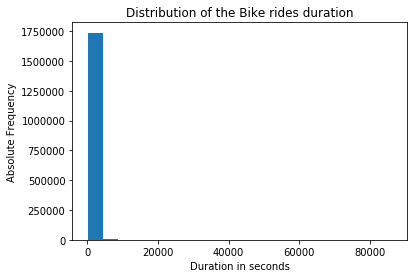

In [39]:
# plot a Histogram of the distribution
plt.hist(df_allRides.duration_sec, bins=20);
plt.xlabel('Duration in seconds');
plt.ylabel('Absolute Frequency');
plt.title('Distribution of the Bike rides duration');

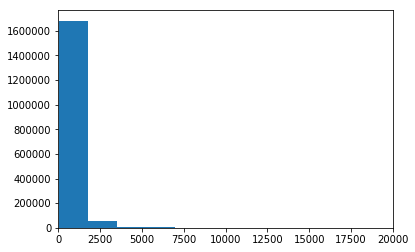

In [40]:
# let's zoom on the x-axis
plt.hist(df_allRides.duration_sec, bins=50);
plt.xlim(0, 20e3);

float64


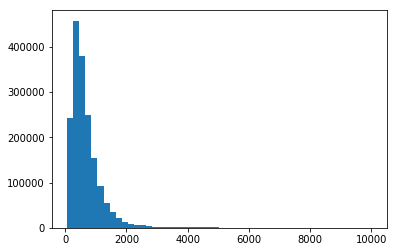

In [41]:
print(df_allRides.duration_sec.dtype);
df_extract= df_allRides.query('duration_sec < 10000');
plt.hist(df_extract.duration_sec, bins=50);

#### First observation about the visualization and next steps to take:

We can see clearly that the distribution is extremly right skewed, with outliers far right on the x-axis by more than $8e4$ seconds (that is, more than ca. 22 hours). The vast majority of the ride durations are less than $2000$ seconds (less than 33 minutes). We cannot see anything more than that,from this plot, though. <br><br>Here are the <b>next steps</b> we will take, to try and gain insights on the distribution:
- 1/ We will change the units of the duration time of the rides, from seconds to minutes, to deal with smaller numbers
- 2/ We will explore the distribution more in detail, by trying to identify common characteristics of outliers records
- 3/ We will perform a logarythmic transform on the x-axis, method typically used, when the linear distribution of the x-values is extremely right skewed

#### Next step 1: change unit of the duration from <i>seconds</i> to <i>minutes</i>

In [42]:
# Change the Duration unit to number of minutes (as an integer)
df_allRides['duration_min'] = df_allRides['duration_sec']//60

# Drop the 'duration_sec' Column:
df_allRides.drop('duration_sec', axis=1, inplace=True)
print(df_allRides.columns)

Index(['age_level', 'bike_id', 'bike_share', 'bike_share_for_all_trip', 'date',
       'day', 'duration_min', 'end_station_id', 'end_station_latitude',
       'end_station_longitude', 'end_station_name', 'end_time', 'gender',
       'holiday', 'hour_of_day', 'is_weekend', 'member_birth_year',
       'member_gender', 'month', 'month_name', 'start_station_id',
       'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'start_time', 'user_type', 'weekday',
       'weekday_name'],
      dtype='object')


In [43]:
print("Median: ", df_allRides.duration_min.median())
df_allRides.duration_min.describe()

Median:  9.0


count    1.753003e+06
mean     1.247150e+01
std      3.306743e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.438000e+03
Name: duration_min, dtype: float64

In [44]:
# re-order the columns of the dataframe to see the variable 'duration_min' as the first column
cols = df_allRides.columns.tolist()
newcols= ['duration_min'] + df_allRides.columns.drop(['duration_min']).tolist()
df_allRides= df_allRides.reindex(columns=newcols)
df_allRides.head()

,duration_min,age_level,bike_id,bike_share,bike_share_for_all_trip,date,day,end_station_id,end_station_latitude,end_station_longitude,...,month,month_name,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,weekday_name
0,2.0,NaN,2473.0,NaN,No,NaN,NaN,311,37.333798,-121.886943,...,NaN,NaN,316,37.330165,-121.885831,San Salvador St at 1st St,2018-01-01 00:07:41.040,Subscriber,NaN,NaN
1,11.0,NaN,2423.0,NaN,No,NaN,NaN,70,37.773311,-122.444293,...,NaN,NaN,74,37.776435,-122.426244,Laguna St at Hayes St,2018-01-01 00:07:52.943,Subscriber,NaN,NaN
2,19.0,NaN,3455.0,NaN,No,NaN,NaN,125,37.759200,-122.409851,...,NaN,NaN,97,37.768265,-122.420110,14th St at Mission St,2018-01-01 00:09:31.745,Subscriber,NaN,NaN
3,22.0,NaN,2173.0,NaN,No,NaN,NaN,323,37.798014,-122.405950,...,NaN,NaN,11,37.797280,-122.398436,Davis St at Jackson St,2018-01-01 00:14:37.187,Customer,NaN,NaN
4,43.0,NaN,1788.0,NaN,Yes,NaN,NaN,8,37.799953,-122.398525,...,NaN,NaN,17,37.792251,-122.397086,Embarcadero BART Station (Beale St at Market St),2018-01-01 00:15:33.369,Subscriber,NaN,NaN


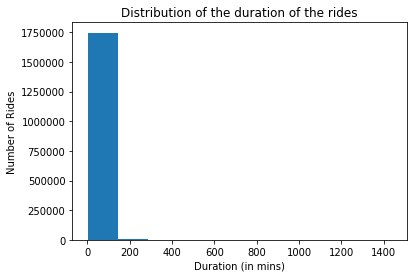

In [45]:
plt.hist(df_allRides.duration_min);
plt.xlabel('Duration (in mins)');
plt.ylabel('Number of Rides');
plt.title("Distribution of the duration of the rides");
plt.grid(False)

As we expected, changing the duration units to minutes, to deal with smaller numbers, but keeping a linear scale for the x-axis, did not improve the Readability of the Plot.

#### Next step 2: identifying outliers

In [46]:
total_number_of_rides = df_allRides.shape[0]
df_minus10 = df_allRides[df_allRides.duration_min <11]
minus_10_in_percent = df_minus10.shape[0]/total_number_of_rides*100
print(minus_10_in_percent)

61.791508628336636


About <b>62%</b> of the ride's durations are less than, or equal to 10 minutes

99.43479845727589
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100] [333192. 649255. 388437. 185148.  83630.  42087.  20211.  12279.   8494.
   4674.   3335.   2777.   1866.   1639.   1329.   1166.   1028.    930.
    744.    874.]


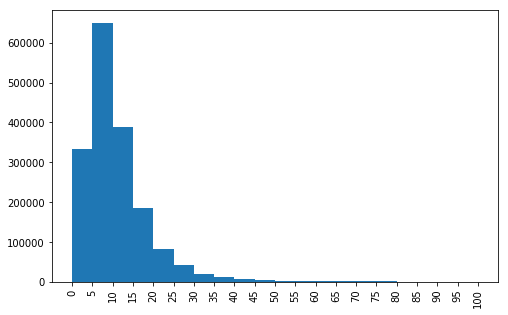

In [47]:
df_minus_100 = df_allRides[df_allRides.duration_min <101]
bins_int= np.arange(0, 101, 5).round()
fig = plt.figure(figsize=[8,5])
n, bins, patches= plt.hist(df_minus_100.duration_min, bins=bins_int, edgecolor='none')
plt.xticks(bins, bins, rotation=90);
minus_100_in_percent = df_minus_100.shape[0]/total_number_of_rides*100
print(minus_100_in_percent)
print(bins, n)


In [48]:
print("Proportion of rides between 5 and 10 minutes: ", n[1]/total_number_of_rides*100)

Proportion of rides between 5 and 10 minutes:  37.03673068443123


More than <b>99%</b> of the ride's durations are less or equal than 100 minutes (1h40min) and <b>37%</b> of the rides alone, take between 5 and 10 minutes.

#### Let's have a look at the rentals which duration exceeds 200 minutes (about 3 hours and 20 minutes) and that represent a very small proportion of the whole:

In [49]:
df_over200 = df_allRides[df_allRides.duration_min >=200]
print("Shape: ",df_over200.shape)
print("Proportion: ", df_over200.shape[0]/total_number_of_rides*100)

Shape:  (4276, 28)
Proportion:  0.24392428307310368


<b>0.2%</b> of the rides duration exceed 3 hours and 20 minutes 

In [50]:
df_over200.describe()

,duration_min,bike_id,day,end_station_latitude,end_station_longitude,hour_of_day,member_birth_year,month,start_station_latitude,start_station_longitude,weekday
count,4276.000000,4276.000000,0.0,4276.000000,4276.000000,0.0,4276.000000,0.0,4276.000000,4276.000000,0.0
mean,535.975444,2446.422357,NaN,37.765031,-122.342182,NaN,1983.433115,NaN,37.765141,-122.341492,NaN
std,342.768872,1319.742545,NaN,0.153971,0.463812,NaN,10.717924,NaN,0.153603,0.463658,NaN
min,200.000000,18.000000,NaN,37.312854,-122.453704,NaN,1888.000000,NaN,37.312854,-122.473658,NaN
25%,254.000000,1337.500000,NaN,37.770083,-122.416040,NaN,1978.000000,NaN,37.770407,-122.415674,NaN
50%,385.000000,2543.000000,NaN,37.782405,-122.400869,NaN,1985.000000,NaN,37.783813,-122.399970,NaN
75%,779.000000,3574.000000,NaN,37.799953,-122.289370,NaN,1991.000000,NaN,37.797673,-122.285518,NaN
max,1438.000000,5577.000000,NaN,44.950000,-93.220000,NaN,2000.000000,NaN,44.950000,-93.220000,NaN


[1767.  624.  378.  266.  254.  262.  251.  198.  152.  124.]
[ 200.   323.8  447.6  571.4  695.2  819.   942.8 1066.6 1190.4 1314.2
 1438. ]


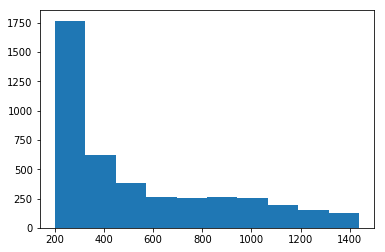

In [51]:
(n, bins, patches)= plt.hist(df_over200.duration_min);
print(n) # number of records in each bin
print(bins) # edges of each bin (10 per default)

The number of rides past 324 minutes in duration, drops considerably and quite continously as the duration grows.

#### Let's have a look at the very few rentals which duration exceeds 20 hours (1200 minutes)) :

In [52]:
df_over20hours = df_over200[df_over200.duration_min >= 1200]
print("Number of rides over 20 hours: {}\nProportion of the whole dataset: {:.3f}%".format(\
      df_over20hours.shape[0], df_over20hours.shape[0]/total_number_of_rides*100))

Number of rides over 20 hours: 265
Proportion of the whole dataset: 0.015%


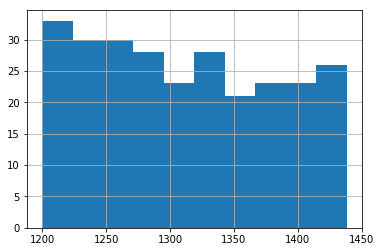

In [53]:
df_over20hours.duration_min.hist();

In [54]:
df_over20hours.head()

,duration_min,age_level,bike_id,bike_share,bike_share_for_all_trip,date,day,end_station_id,end_station_latitude,end_station_longitude,...,month,month_name,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,weekday_name
254,1338.0,NaN,3430.0,NaN,No,NaN,NaN,241,37.852477,-122.270213,...,NaN,NaN,241,37.852477,-122.270213,Ashby BART Station,2018-01-01 11:36:19.268,Customer,NaN,NaN
6612,1279.0,NaN,1962.0,NaN,No,NaN,NaN,230,37.810743,-122.291415,...,NaN,NaN,7,37.804562,-122.271738,Frank H Ogawa Plaza,2018-01-03 20:07:22.222,Subscriber,NaN,NaN
12952,1223.0,NaN,2922.0,NaN,No,NaN,NaN,15,37.795392,-122.394203,...,NaN,NaN,66,37.778742,-122.392741,3rd St at Townsend St,2018-01-06 17:06:15.153,Subscriber,NaN,NaN
20068,1403.0,NaN,3653.0,NaN,No,NaN,NaN,72,37.772406,-122.435650,...,NaN,NaN,15,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-01-10 10:01:32.352,Subscriber,NaN,NaN
24871,1327.0,NaN,3597.0,NaN,Yes,NaN,NaN,202,37.800754,-122.274894,...,NaN,NaN,197,37.808848,-122.249680,El Embarcadero at Grand Ave,2018-01-11 17:46:48.473,Subscriber,NaN,NaN


#### Can we seem to find common characteristics to these 265 rentals which duration exceeds 20 hours? To try and answer this question, we can have an overview of the variables and try to identify clear tendencies in the values taken. 

Where these rides maybe related to a specific event occuring that year? 

In [55]:
# In which month of the year do these rides occur?
df_outliers= pd.DataFrame()
df_outliers['month']= df_over20hours.start_time.dt.month_name()
df_outliers.month.value_counts()

July         36
June         35
August       30
September    27
April        25
May          25
February     20
October      18
November     15
January      14
March        12
December      8
Name: month, dtype: int64

There is no specific month within which these rides took place. So there is no evidence that these rides were possibly used for a specific event that occured at a particular date. 

In [56]:
df_over20hours.user_type.value_counts()/df_over20hours.shape[0]*100

Customer      64.150943
Subscriber    35.849057
Name: user_type, dtype: float64

In [57]:
df_allRides.user_type.value_counts()/df_allRides.shape[0]*100

Subscriber    88.462997
Customer      11.537003
Name: user_type, dtype: float64

About 64% of the very few users, that took the longest rides were customers, whereas these, represent only 11.5% of all the users.

In [58]:
df_over20hours.bike_share_for_all_trip.value_counts()

No     242
Yes     23
Name: bike_share_for_all_trip, dtype: int64

In [59]:
df_allRides.bike_share_for_all_trip.value_counts()

No     1590672
Yes     162331
Name: bike_share_for_all_trip, dtype: int64

In [60]:
df_over20hours.member_gender.value_counts()/df_over20hours.shape[0]*100

Male      66.792453
Female    29.811321
Other      3.396226
Name: member_gender, dtype: float64

In [61]:
df_allRides.member_gender.value_counts()/df_allRides.shape[0]*100

Male      73.478768
Female    24.976398
Other      1.544835
Name: member_gender, dtype: float64

In [62]:
print(df_over20hours.member_birth_year.nunique())
df_over20hours.member_birth_year.describe()

45


count     265.000000
mean     1984.652830
std        10.707555
min      1949.000000
25%      1980.000000
50%      1987.000000
75%      1992.000000
max      2000.000000
Name: member_birth_year, dtype: float64

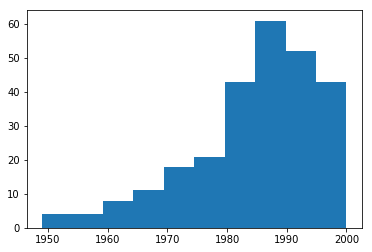

In [63]:
plt.hist(df_over20hours.member_birth_year);

In [64]:
df_allRides.member_birth_year.nunique()

86

In [65]:
df_allRides.member_birth_year.describe()

count    1.753003e+06
mean     1.983088e+03
std      1.044289e+01
min      1.881000e+03
25%      1.978000e+03
50%      1.985000e+03
75%      1.991000e+03
max      2.000000e+03
Name: member_birth_year, dtype: float64

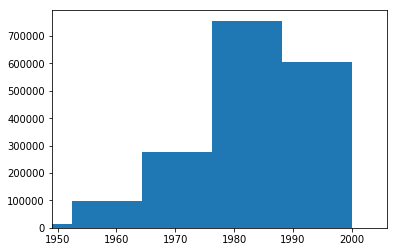

In [66]:
plt.hist(df_allRides.member_birth_year);
plt.xlim(left=1949);

The variable representing the age of the users that took the longest rides, does not seem to be differently distributed than for all users. 

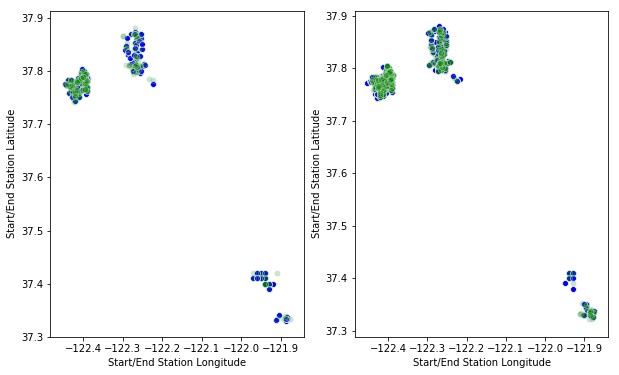

In [67]:
# check out the location coordinates
plt.figure(figsize=[10,6]);
plt.subplot(1,2,1);
sns.scatterplot(data=df_over20hours, x='start_station_longitude', y='start_station_latitude', color='blue');
sns.scatterplot(data=df_over20hours, x='end_station_longitude', y='end_station_latitude', alpha=1/5, color= 'green');
plt.xlabel('Start/End Station Longitude');
plt.ylabel('Start/End Station Latitude');

df_sample= df_allRides.sample(1000);
plt.subplot(1,2,2);
sns.scatterplot(data=df_sample, x='start_station_longitude', y='start_station_latitude', color='blue');
sns.scatterplot(data=df_sample, x='end_station_longitude', y='end_station_latitude', alpha=1/5, color='green');
plt.xlabel('Start/End Station Longitude');
plt.ylabel('Start/End Station Latitude');

In [68]:
# proportion of pickup and drop-off stations located in San Fransisco for the rentals that lasted longer than 20 hours 
df_sfo= df_over20hours.loc[(df_over20hours.start_station_latitude > 37.7) & (df_over20hours.end_station_latitude > 37.7)\
                          & (df_over20hours.start_station_longitude < -122.3) & (df_over20hours.end_station_longitude <-122.3)]
df_sfo.shape[0]/df_over20hours.shape[0]*100

64.52830188679245

In [69]:
# proportion of pickup and drop-off stations in San Fransisco for the whole dataset
df_sfo_full= df_allRides.loc[(df_allRides.start_station_latitude > 37.7) & (df_allRides.end_station_latitude > 37.7)\
                            & (df_allRides.start_station_longitude<-122.3) & (df_allRides.end_station_longitude<122.3)]
df_sfo_full.shape[0]/df_allRides.shape[0]*100

72.66758813304939

At first glance, I don't seem to notice any particular differences in the locations between the outliers and the whole dataset.

#### Conclusion about the outliers in the dataset, being the rides that lasted much longer than most of the rides and specifically, those that lasted longer than 20 hours: 
The only difference that I could clearly see, between this group of records and the whole dataset, lyies in the type of users:
As opposed to the tendency showed for the whole group, there is a majority of users of type "Customer" in these outliers, about 64%, whereas this type represents only 11.5% of the full dataset.

#### Last step 3: changing the scale of the x-axis, from linear to logarythmic, for plotting the distribution of the "duration" variable :

In [70]:
df_allRides.duration_min.describe()

count    1.753003e+06
mean     1.247150e+01
std      3.306743e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.438000e+03
Name: duration_min, dtype: float64

In [71]:
# calculate the bin edges if we want a total number, of about 10 bins:
x_max= df_allRides.duration_min.max()
x_min= df_allRides.duration_min.min()
log_range= np.log10(x_max)-np.log10(x_min) # range of the log-values
step_10_bins= round(log_range/10,1) # we round the value to one decimal
print(log_range, step_10_bins)
bins_10= (10 ** np.arange(np.log10(x_min), np.log10(x_max)+step_10_bins, step_10_bins)).round()
print(bins_10) # bin edges as integers, in the original units of x (minutes)

3.1577588860468637 0.3
[1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.300e+01
 1.260e+02 2.510e+02 5.010e+02 1.000e+03 1.995e+03]


[2.67780e+04 1.74874e+05 5.44521e+05 6.74209e+05 2.71372e+05 4.29220e+04
 1.07710e+04 4.31000e+03 1.55200e+03 1.09400e+03 6.00000e+02]
[1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.300e+01
 1.260e+02 2.510e+02 5.010e+02 1.000e+03 1.995e+03]


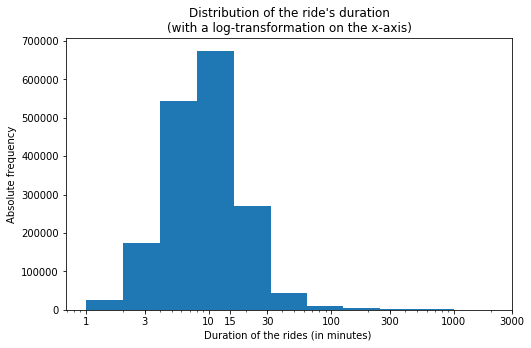

In [72]:
# plot the distribution with a log scale on the x values
fig = plt.figure(figsize=[8,5]);
n, bins, patches= plt.hist(x=df_allRides['duration_min'], bins=bins_10, edgecolor='none');
plt.xscale('log');
x_ticks = [1, 3, 10, 15, 30, 100, 300, 1e3, 3e3] # xticks in the original units
str_xticks = ['{:.0f}'.format(v) for v in x_ticks] # ticks labels
plt.xticks(x_ticks, str_xticks);
plt.xlabel('Duration of the rides (in minutes) ')
plt.ylabel('Absolute frequency');
plt.title('Distribution of the ride\'s duration\n(with a log-transformation on the x-axis)');

print(n); # frequencies of rides in each bin
print(bins) # bin edges
#sns.axes_style("ticks");

#### Take smaller bins, to get a finer Distribution

In [73]:
smaller_bins= 10 ** np.arange(np.log10(x_min), np.log10(x_max)+0.1, 0.1)
smaller_bins= [round(x,1) for x in smaller_bins] # round bin edges to one decimal
print(smaller_bins)

[1.0, 1.3, 1.6, 2.0, 2.5, 3.2, 4.0, 5.0, 6.3, 7.9, 10.0, 12.6, 15.8, 20.0, 25.1, 31.6, 39.8, 50.1, 63.1, 79.4, 100.0, 125.9, 158.5, 199.5, 251.2, 316.2, 398.1, 501.2, 631.0, 794.3, 1000.0, 1258.9, 1584.9]


Number of bins with a step of 0.1 for the log x_values:  32
Frequencies in each bin:  [2.67780e+04 0.00000e+00 0.00000e+00 6.63710e+04 1.08503e+05 0.00000e+00
 1.31540e+05 2.81140e+05 1.31841e+05 2.36274e+05 2.64051e+05 1.73884e+05
 1.35650e+05 9.42090e+04 4.15130e+04 2.24850e+04 1.39200e+04 6.88300e+03
 4.47700e+03 3.43900e+03 2.48900e+03 1.90500e+03 1.37500e+03 1.04200e+03
 6.75000e+02 4.79000e+02 3.90000e+02 3.10000e+02 3.41000e+02 4.39000e+02
 4.08000e+02 1.92000e+02]
Bin edges:  [1.0000e+00 1.3000e+00 1.6000e+00 2.0000e+00 2.5000e+00 3.2000e+00
 4.0000e+00 5.0000e+00 6.3000e+00 7.9000e+00 1.0000e+01 1.2600e+01
 1.5800e+01 2.0000e+01 2.5100e+01 3.1600e+01 3.9800e+01 5.0100e+01
 6.3100e+01 7.9400e+01 1.0000e+02 1.2590e+02 1.5850e+02 1.9950e+02
 2.5120e+02 3.1620e+02 3.9810e+02 5.0120e+02 6.3100e+02 7.9430e+02
 1.0000e+03 1.2589e+03 1.5849e+03]


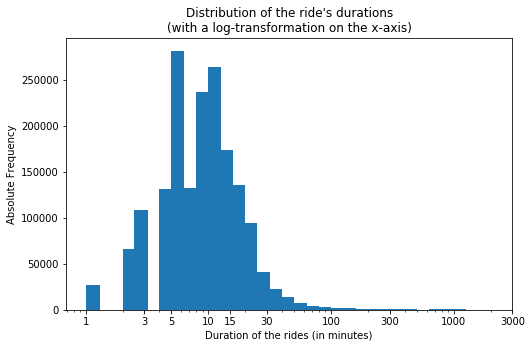

In [74]:
# take a step of 0.1 for the log values on the x-axis
fig = plt.figure(figsize=[8,5])
n, bins, patches= plt.hist(df_allRides.duration_min, bins=smaller_bins);
plt.xscale('log');
x_ticks = [1, 3, 5, 10, 15, 30, 100, 300, 1e3, 3e3] # xticks in the original units
labels=['{:.0f}'.format(v) for v in x_ticks] # labels
plt.xticks(x_ticks, labels);
plt.xlabel('Duration of the rides (in minutes)');
plt.ylabel('Absolute Frequency');
plt.title('Distribution of the ride\'s durations\n(with a log-transformation on the x-axis)');
print("Number of bins with a step of 0.1 for the log x_values: ", len(n))
print("Frequencies in each bin: ", n) #frequencies in each bin
print("Bin edges: ", bins)

### Conclusion on the Distribution of the rentals duration: <br>
The distribution of the duration variable looks approximatly <b>"log-normal"</b>, this appears when applying a logarithmic transformation on the x-axis. We have seen that it is also, when plotted in the original units and linear scale, unimodal and extremly right skewed.<br>99 % of the rentals last between 1 minute and 1h 40 minutes. The most common range of the duration is between 5 and 10 minutes.

#### Going back to assessing: before moving on with our Analysis, we want to verify that the 'duration' values do not contain accuracy issues and correspond exactly to the difference between end_time and start_time timestamps:

In [75]:
# we add a new column for the time difference
df_allRides['time_delta'] = df_allRides['end_time']-df_allRides['start_time']
test = df_allRides['time_delta'][:10]
print(test)

0   00:02:25.201000
1   00:11:54.132000
2   00:19:11.414000
3   00:22:39.258000
4   00:43:23.153000
5   00:41:18.860000
6   00:39:39.086000
7   00:18:19.802000
8   00:22:32.142000
9   00:19:45.473000
Name: time_delta, dtype: timedelta64[ns]


In [76]:
df_allRides['time_delta'].describe()

count                     1753003
mean       0 days 00:12:58.267126
std        0 days 00:33:03.994232
min      -1 days +23:02:50.470000
25%        0 days 00:05:44.906500
50%        0 days 00:09:03.614000
75%        0 days 00:14:01.573500
max        0 days 23:58:01.919000
Name: time_delta, dtype: object

In [77]:
# get the time_delta as minutes
series_minute = pd.Series(df_allRides['time_delta']//np.timedelta64(1, 'm'))
series_minute.describe()

count    1.753003e+06
mean     1.247129e+01
std      3.306769e+01
min     -5.800000e+01
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.438000e+03
Name: time_delta, dtype: float64

The negative value needs to be investigated!

In [78]:
df_td_negative= df_allRides[series_minute <0]
print(df_td_negative.shape)
df_td_negative.head()

(6, 29)


,duration_min,age_level,bike_id,bike_share,bike_share_for_all_trip,date,day,end_station_id,end_station_latitude,end_station_longitude,...,month_name,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,weekday_name,time_delta
1515497,14.0,NaN,2331.0,NaN,No,NaN,NaN,27,37.788059,-122.391865,...,NaN,59,37.774814,-122.418954,S Van Ness Ave at Market St,2018-11-04 01:48:20.009,Subscriber,NaN,NaN,-1 days +23:14:38.873000
1515499,15.0,NaN,417.0,NaN,No,NaN,NaN,149,37.831275,-122.285633,...,NaN,183,37.808702,-122.269927,Telegraph Ave at 19th St,2018-11-04 01:51:00.396,Subscriber,NaN,NaN,-1 days +23:15:56.326000
1515500,9.0,NaN,3144.0,NaN,No,NaN,NaN,95,37.766219,-122.431060,...,NaN,375,37.774836,-122.446546,Grove St at Masonic Ave,2018-11-04 01:52:40.494,Subscriber,NaN,NaN,-1 days +23:09:46.662000
1515503,2.0,NaN,2487.0,NaN,No,NaN,NaN,134,37.752428,-122.420628,...,NaN,132,37.751819,-122.426614,24th St at Chattanooga St,2018-11-04 01:58:47.745,Subscriber,NaN,NaN,-1 days +23:02:50.470000
1515504,3.0,NaN,2136.0,NaN,No,NaN,NaN,61,37.776513,-122.411306,...,NaN,41,37.781270,-122.418740,Golden Gate Ave at Polk St,2018-11-04 01:59:01.906,Subscriber,NaN,NaN,-1 days +23:03:46.898000


All the negative values for time differences between Pick-up and Drop-off times, appear for rentals made on the 4th of November 2018, before 2am and for a duration time less than one hour. This corresponds to the local time change to PST(Pacific Standard Time) <br> Now let's take a look at all the Records which duration time is not equivalent to the calculated difference between the Drop-off and Pick-up times:

In [79]:
print((series_minute == df_allRides['duration_min']).all())

False


In [80]:
#### Select all rows where the time delta in minutes is > duration in minutes
mask_diff= series_minute > df_allRides['duration_min']
df_check= df_allRides[mask_diff]
df_check.shape

(3, 29)

In [81]:
#### Select all rows where the time delta in minutes is different from the duration in minutes
mask_diff = ~(series_minute == df_allRides['duration_min'])
df_check = df_allRides[mask_diff]
df_check.shape

(12, 29)

In [82]:
df_check.head()

,duration_min,age_level,bike_id,bike_share,bike_share_for_all_trip,date,day,end_station_id,end_station_latitude,end_station_longitude,...,month_name,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,weekday_name,time_delta
216947,1253.0,NaN,2076.0,NaN,No,NaN,NaN,114,37.764478,-122.402570,...,NaN,114,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-10 15:56:52.488,Customer,NaN,NaN,21:53:29.482000
217265,1160.0,NaN,610.0,NaN,No,NaN,NaN,97,37.768265,-122.420110,...,NaN,23,37.791464,-122.391034,The Embarcadero at Steuart St,2018-03-10 17:58:27.657,Subscriber,NaN,NaN,20:20:44.144000
217696,744.0,NaN,2092.0,NaN,No,NaN,NaN,240,37.866043,-122.258804,...,NaN,245,37.870348,-122.267764,Downtown Berkeley BART,2018-03-11 00:19:40.186,Customer,NaN,NaN,13:24:30.709000
1513624,1339.0,NaN,2739.0,NaN,No,NaN,NaN,21,37.789625,-122.400811,...,NaN,6,37.804770,-122.403234,The Embarcadero at Sansome St,2018-11-03 14:53:50.222,Customer,NaN,NaN,21:19:39.414000
1514179,845.0,NaN,4363.0,NaN,No,NaN,NaN,345,37.766474,-122.398295,...,NaN,109,37.763316,-122.421904,17th St at Valencia St,2018-11-03 16:42:51.773,Customer,NaN,NaN,13:05:35.788000


In [83]:
df_check.loc[:,'time_delta_in_mins'] = pd.Series(df_check['time_delta']//np.timedelta64(1, 'm'))
df_check = df_check.loc[:, ['start_time', 'end_time', 'time_delta', 'time_delta_in_mins' \
                            ,'duration_min']].copy()
df_check.head(12)

/Users/RinkaLaOne/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/RinkaLaOne/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,start_time,end_time,time_delta,time_delta_in_mins,duration_min
216947,2018-03-10 15:56:52.488,2018-03-11 13:50:21.970,21:53:29.482000,1313,1253.0
217265,2018-03-10 17:58:27.657,2018-03-11 14:19:11.801,20:20:44.144000,1220,1160.0
217696,2018-03-11 00:19:40.186,2018-03-11 13:44:10.895,13:24:30.709000,804,744.0
1513624,2018-11-03 14:53:50.222,2018-11-04 12:13:29.636,21:19:39.414000,1279,1339.0
1514179,2018-11-03 16:42:51.773,2018-11-04 05:48:27.561,13:05:35.788000,785,845.0
1514515,2018-11-03 17:47:11.376,2018-11-04 11:19:06.909,17:31:55.533000,1051,1111.0
1515497,2018-11-04 01:48:20.009,2018-11-04 01:02:58.882,-1 days +23:14:38.873000,-46,14.0
1515499,2018-11-04 01:51:00.396,2018-11-04 01:06:56.722,-1 days +23:15:56.326000,-45,15.0
1515500,2018-11-04 01:52:40.494,2018-11-04 01:02:27.156,-1 days +23:09:46.662000,-51,9.0
1515503,2018-11-04 01:58:47.745,2018-11-04 01:01:38.215,-1 days +23:02:50.470000,-58,2.0


Apart from the 6 cases we already identified, where the calculated time delta is negative,
there are 3 more cases of rentals that were made on the 4th November 2018, also during a local time change to PST, for a duration longer than an hour. The time delta counts exactly 6o minutes less than the real duration.<br>The 3 last cases are rentals that were made on the 11th of march during a local time change to PDT (Pacific Daylight Time). There the time delta counts exactly 60 minutes more than the real duration of the ride.


#### Conclusion: 
The singularity we found, where the duration in minutes does not correspond to the difference in minutes between the end and start times, are explained by the <b>local time change to PST (Pacific Standard Time, on 4th of November at 02:00am) and PDT (Pacific Daylight Time, on 11th of March at 02:00am)</b>.<br>On the first case the clock goes back one hour (so the time delta can even be negative, when the duration of rental is less than one hour), on the second case, the clock jumps to one hour more.<br>So our Suspicion on the Accuracy of the date time data is not founded. And the datetime values  as well as the duration values are accurate.

<a id='rentalsvstime'></a>
### Next, I'm interested in investigating the number of rides, in relation to the "moments in time", where the bikes were rented.

- [Rentals per month of the year](#month)
- [Rentals per day of the week](#weekday)
- [Rentals per hour of the day](#hourofday)

[Back to Exploratory Data Analysis](#eda)

#### I will first add new columns in my Dataset, for each "time perspective" i want to group my data by.

In [84]:
# I am using a subsetted DataFrame to work just with the variables I'm interested in.
df_time = pd.DataFrame()
df_time= df_allRides.loc[:, ['start_time', 'end_time', 'duration_min']].copy()
# making a copy will ensure we do not get a SettingWithCopyWarning 

In [85]:
df_time.head()

,start_time,end_time,duration_min
0,2018-01-01 00:07:41.040,2018-01-01 00:10:06.241,2.0
1,2018-01-01 00:07:52.943,2018-01-01 00:19:47.075,11.0
2,2018-01-01 00:09:31.745,2018-01-01 00:28:43.159,19.0
3,2018-01-01 00:14:37.187,2018-01-01 00:37:16.445,22.0
4,2018-01-01 00:15:33.369,2018-01-01 00:58:56.522,43.0


In [86]:
# I am extracting date and time Components from the 'start_time' Variable
df_time.loc[:, 'month'] = df_time.start_time.dt.month
df_time.loc[:, 'month_name'] = df_time.start_time.dt.month_name()
df_time.loc[:, 'day'] = df_time.start_time.dt.day
df_time.loc[:, 'date'] = df_time.start_time.dt.date
df_time.loc[:, 'weekday'] = df_time.start_time.dt.weekday
df_time.loc[:, 'weekday_name'] = df_time.start_time.dt.day_name()

df_time.head()

,start_time,end_time,duration_min,month,month_name,day,date,weekday,weekday_name
0,2018-01-01 00:07:41.040,2018-01-01 00:10:06.241,2.0,1,January,1,2018-01-01,0,Monday
1,2018-01-01 00:07:52.943,2018-01-01 00:19:47.075,11.0,1,January,1,2018-01-01,0,Monday
2,2018-01-01 00:09:31.745,2018-01-01 00:28:43.159,19.0,1,January,1,2018-01-01,0,Monday
3,2018-01-01 00:14:37.187,2018-01-01 00:37:16.445,22.0,1,January,1,2018-01-01,0,Monday
4,2018-01-01 00:15:33.369,2018-01-01 00:58:56.522,43.0,1,January,1,2018-01-01,0,Monday


In [87]:
# I also want to distinguish wether the day of rental is a Holiday or a Weekend day or a \
# business day
from pandas.tseries.holiday import USFederalHolidayCalendar
holidays_2018= USFederalHolidayCalendar().holidays('2018-01-01', '2018-12-31')
print(holidays_2018, type(holidays_2018))
print("Number of national holidays: ",len(holidays_2018))

DatetimeIndex(['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28',
               '2018-07-04', '2018-09-03', '2018-10-08', '2018-11-12',
               '2018-11-22', '2018-12-25'],
              dtype='datetime64[ns]', freq=None) <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Number of national holidays:  10


In [88]:
# convert to date types, so we can compare these values to the dates in our dataframe  
holidays= [day.date() for day in holidays_2018]
print(holidays, type(holidays))

[datetime.date(2018, 1, 1), datetime.date(2018, 1, 15), datetime.date(2018, 2, 19), datetime.date(2018, 5, 28), datetime.date(2018, 7, 4), datetime.date(2018, 9, 3), datetime.date(2018, 10, 8), datetime.date(2018, 11, 12), datetime.date(2018, 11, 22), datetime.date(2018, 12, 25)] <class 'list'>


In [89]:
# add 2 variables to hold if a record's date fall on a holiday and on a week-end 
df_time['holiday']= df_time.date.isin(holidays)
df_time['is_weekend']= df_time.weekday >=5

df_time.head(2)

,start_time,end_time,duration_min,month,month_name,day,date,weekday,weekday_name,holiday,is_weekend
0,2018-01-01 00:07:41.040,2018-01-01 00:10:06.241,2.0,1,January,1,2018-01-01,0,Monday,True,False
1,2018-01-01 00:07:52.943,2018-01-01 00:19:47.075,11.0,1,January,1,2018-01-01,0,Monday,True,False


In [90]:
# just checking how many days of national holidays appear in our dataset
df_time[df_time.holiday].date.nunique()


10

Bikes have been rented on every national holiday of the year 2018.

Finally, I need to add a new variable to my dataset, to observe the records according to the hour of the day the rentals were picked-up:

In [91]:
df_time['hour_of_day']= df_time.start_time.dt.hour

The 'time' subset of my Dataset looks like this now:

In [92]:
df_time.sample(5)

,start_time,end_time,duration_min,month,month_name,day,date,weekday,weekday_name,holiday,is_weekend,hour_of_day
773222,2018-07-03 15:06:32.247,2018-07-03 15:16:20.848,9.0,7,July,3,2018-07-03,1,Tuesday,False,False,15
1615472,2018-11-28 17:20:55.377,2018-11-28 17:31:45.411,10.0,11,November,28,2018-11-28,2,Wednesday,False,False,17
1724170,2018-12-20 23:32:20.988,2018-12-20 23:48:09.096,15.0,12,December,20,2018-12-20,3,Thursday,False,False,23
1384991,2018-10-13 11:58:33.900,2018-10-13 12:09:49.842,11.0,10,October,13,2018-10-13,5,Saturday,False,True,11
1610001,2018-11-27 12:37:33.423,2018-11-27 13:01:58.369,24.0,11,November,27,2018-11-27,1,Tuesday,False,False,12


In [93]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753003 entries, 0 to 1753002
Data columns (total 12 columns):
start_time      datetime64[ns]
end_time        datetime64[ns]
duration_min    float64
month           int64
month_name      object
day             int64
date            object
weekday         int64
weekday_name    object
holiday         bool
is_weekend      bool
hour_of_day     int64
dtypes: bool(2), datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 137.1+ MB


<a id="month"></a>
#### Plot the Frequency of rentals per month of the year:

In [94]:
df_bymonth= df_time.groupby('month').size()
df_bymonth

month
1      86963
2      98626
3     102347
4     121791
5     167376
6     183364
7     186793
8     181247
9     176303
10    192804
11    129037
12    126352
dtype: int64

In [95]:
# hold the month name for each month, for a clearer labelling of the x-axis
import calendar

months = [calendar.month_name[i] for i in df_bymonth.index]
print(months)


['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


We will use a Lineplot to visualyze the trend of the monthly Frequency of rentals.

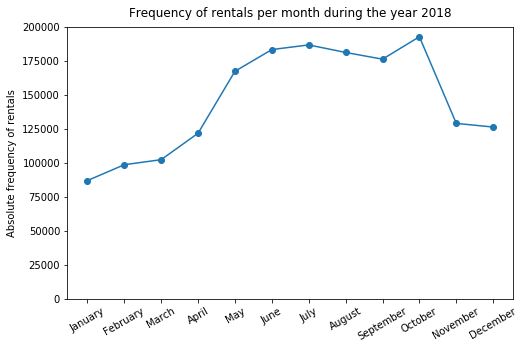

In [96]:
# Plot the number of rentals by month 
plt.figure(figsize=[8,5]);
plt.plot(df_bymonth.index, df_bymonth, 'o-');
# start y with 0
plt.ylim(0, 200000);
plt.xticks(df_bymonth.index, labels=months, rotation= 30);
plt.ylabel("Absolute frequency of rentals", labelpad=5);
plt.title("Frequency of rentals per month during the year 2018", pad=10);

Let's calculate the relative frequencies of rentals for each month and also for each season:

In [97]:
total_number_of_rides= df_bymonth.sum()
print("Number of rides: ",total_number_of_rides)

#Proportion of rentals by month in percent
print("Proportion of rides by month:\n", df_bymonth/total_number_of_rides*100)
print()

# Proportion of rentals by season
print("Proportion of rides by season:\n")
winter= df_bymonth.loc[[1,2,12]]
print(winter.sum(), 'Proportion of rides in winter: {:.1f}%'.format(winter.sum()/total_number_of_rides*100))
spring= df_bymonth.loc[[3,4,5]]
print(spring.sum(), 'Proportion of rides in spring: {:.1f}%'.format(spring.sum()/total_number_of_rides*100))
summer= df_bymonth.loc[[6,7,8]]
print(summer.sum(), 'Proportion of rides in summer: {:.1f}%'.format(summer.sum()/total_number_of_rides*100))
fall= df_bymonth.loc[[9,10,11]]
print(fall.sum(), 'Proportion of rides in fall: {:.1f}%'.format(fall.sum()/total_number_of_rides*100))

Number of rides:  1753003
Proportion of rides by month:
 month
1      4.960802
2      5.626117
3      5.838381
4      6.947564
5      9.547959
6     10.459994
7     10.655601
8     10.339229
9     10.057199
10    10.998498
11     7.360912
12     7.207746
dtype: float64

Proportion of rides by season:

311941 Proportion of rides in winter: 17.8%
391514 Proportion of rides in spring: 22.3%
551404 Proportion of rides in summer: 31.5%
498144 Proportion of rides in fall: 28.4%


#### Interpretation of the plot:<br>
The number of rentals per month, clearly vary with the **meteorogical seasons**. We calculated the proportions of rides per season in ascending order:

|  Season | Proportion of rentals |
|:---|:---|
| Winter                |         17.8%         |
| Spring                |         22.3%         |
| Fall                  |         28.4%         |
| Summer                |         31.5%         |

From the plot, we can also identify, more precisely, three different groups of "Frequency Seasons" with similar Proportion of rides per month, in each group:<br> 
The "Low Season" start from January until March and ranges from 5% to 5.8% of rental frequencies per month.<br>The "Mid Season" holds the months of April, November and December and ranges from 6.9% to 7.4%.<br>Finally, the "High Season" starting from May until October holds the highest frequency ranges from 9.5% to 11%<br>
January counts the least rentals made in the whole year (86 963), while more than twice as much rentals were contracted during the month of October (192 804). 

<a id="weekday"></a>
#### Plot the number of rentals for each day of the week:

We will therefore use a barchart, which is well appropriate to compare the outcome for a categorical variable. 

0 Text(0, 0, 'Monday') Monday
1 Text(0, 0, 'Tuesday') Tuesday
2 Text(0, 0, 'Wednesday') Wednesday
3 Text(0, 0, 'Thursday') Thursday
4 Text(0, 0, 'Friday') Friday
5 Text(0, 0, 'Saturday') Saturday
6 Text(0, 0, 'Sunday') Sunday


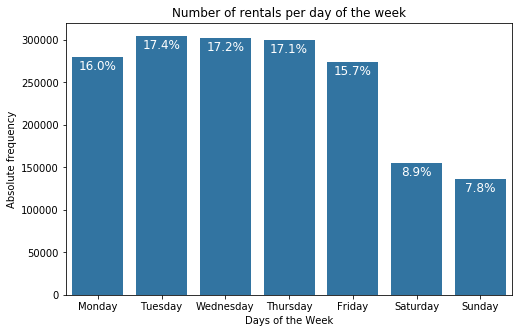

In [98]:
blue_color= sns.color_palette()[0] 
plt.figure(figsize=(8, 5));
days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# we use this array to make sure we keep the days in their natural order within the week.
# plot the barchart with seaborn/countplot:
sns.countplot(data= df_time, x=df_time.weekday_name, order=days,color=blue_color);
plt.xlabel('Days of the Week');
plt.ylabel('Absolute frequency');
plt.title('Number of rentals per day of the week');
#locs_y, ylabels= plt.yticks()
#plt.yticks(locs_y, [0, "50k","100k", "150k", "200k", "250k", "300k"]);
# we also want to annotate the relative frequency (in percents) to simplify the comparison.
day_counts= df_time.weekday_name.value_counts() #to get each absolute frequency value
total_rentals= df_time.shape[0]

locs,labels = plt.xticks()
for loc,label in zip(locs, labels):
    print(loc, label, label.get_text())
    absolute= day_counts[label.get_text()]# get the count for each bar
    pct_str= '{:0.1f}%'.format(absolute/total_rentals*100)# percent with one decimal precision
    plt.text(loc, absolute-15000, pct_str, ha='center', color='white', fontsize=12);
    # absolute-15000 is used to display the percentage value, lower than the top of each bar 

In [99]:
# have a glance at the absolute values
print(day_counts)

Tuesday      304791
Wednesday    302138
Thursday     299465
Monday       280420
Friday       274484
Saturday     155466
Sunday       136239
Name: weekday_name, dtype: int64


#### Interpretation of the plot:<br>
The days of the week during which the most rentals are used, about $17\%$, are, in decreasing order, <i>Tuesday</i> (most of the rentals at all with $ 17.4\%$) until <i>Thursday</i>. A bit less rentals, than on the other working days, are contracted both on <i>Monday</i> and <i>Friday</i>(about $16\%$). 
About half less rentals are used during the week-end (about $8\%$).

[Back to Univariate Exploration](#univariate)

<a id="hourofday"></a>
#### Plot the numbers of rentals picked-up at each hour of the day:

We will also use a barchart, also appropriate when the x-axis values, like the hours of the day here, are numerical, discrete values. We proceed like with the previous plot, adding an annotation of relative frequency for each bar representing the hours, to simplify the comparison.

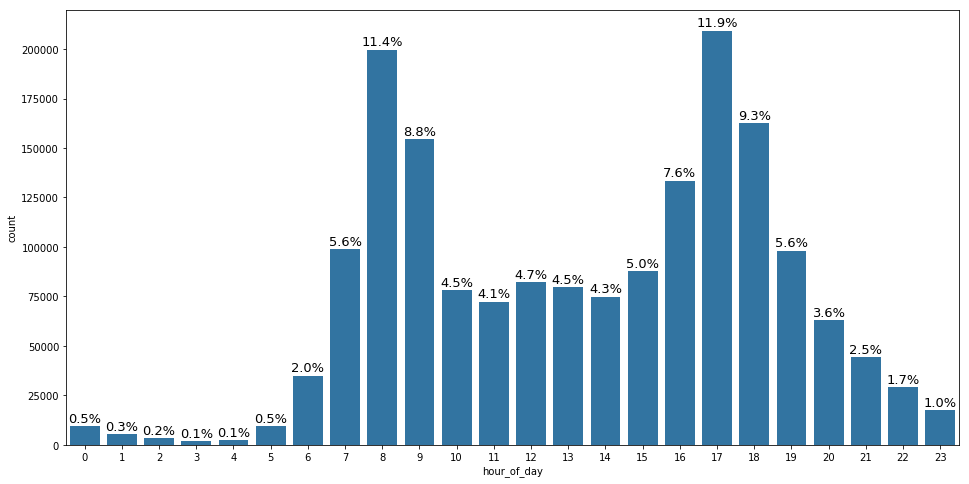

In [100]:
plt.figure(figsize=[16,8])
sns.countplot(data=df_time, x=df_time.hour_of_day, color=blue_color);

# annotate the relative frequency (in percents)
hour_counts= df_time.hour_of_day.value_counts() #to get each absolute frequency value
total_rentals= df_time.shape[0]

locs,labels = plt.xticks()
for loc,label in zip(locs, labels):
    absolute= hour_counts[int(label.get_text())]
    pct_str= '{:0.1f}%'.format(absolute/total_rentals*100)
    plt.text(loc, absolute+2000, pct_str, ha='center', fontsize=13);

In [101]:
# see the absolute values:
print(hour_counts)

17    209262
8     199739
18    162750
9     154527
16    133525
7      98774
19     98145
15     87938
12     82368
13     79559
10     78179
14     74910
11     72439
20     62945
21     44331
6      34960
22     29141
23     17473
5       9574
0       9430
1       5323
2       3294
4       2502
3       1915
Name: hour_of_day, dtype: int64


#### Interpretation:<br>
The plot is clearly bimodal, showing two values for the most common hours for pickin-up a rental: At 8am, for 11.4% of the rentals and 5pm, the most common pick.up hour, for 11.9% of the rentals. Furthermore we can identify 2 ranges for the most common hours of pick-up: 60.2% of the rentals are picked-up between <b>7am and 9am</b> and between <b>4pm and 7pm</b>. Which corresponds to the standard working traffic times.

Finally we will have a glance at the distribution of the number of rentals made per day along the whole year:

In [102]:
df_day = df_time.groupby('date').size()
df_day.describe()

count     365.000000
mean     4802.747945
std      1966.335239
min       508.000000
25%      3247.000000
50%      4603.000000
75%      6765.000000
max      7872.000000
dtype: float64

In [103]:
df_day.head()

date
2018-01-01    1023
2018-01-02    2975
2018-01-03    2699
2018-01-04    3139
2018-01-05    1983
dtype: int64

In [104]:
df_day.isna().any()

False

[ 2.  5. 11. 20. 10. 15. 17. 24. 32. 19. 27. 15. 10.  9. 11. 23. 24. 40.
 33. 18.] [ 508.   876.2 1244.4 1612.6 1980.8 2349.  2717.2 3085.4 3453.6 3821.8
 4190.  4558.2 4926.4 5294.6 5662.8 6031.  6399.2 6767.4 7135.6 7503.8
 7872. ]


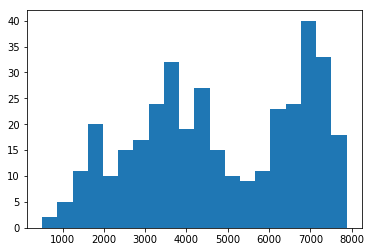

In [105]:
bins= np.linspace(0, df_day.max(), 30, endpoint=True)
n, bins, patches= plt.hist(x=df_day, bins=20);
print(n, bins)

#### Interpretation of the plot:
The Frequency distribution of the rentals per day is approximatly bimodal. The most common number of rentals per day lyies approximately around 7000.

[Back to Exploratory Data Analysis](#eda)

<a id='rentalsvsuser'></a>
### Now we want to explore the frequency of rentals per categorical variables related to the user's characteristics (gender, age, customer/subscriber, resident program) 

- [Number of rentals per Gender](#gender)
- [Number of rentals per Age](#age)
- [Number of rentals per User Type (Customer vs. Subscriber)](#usertype)
- [Number of rentals per "Bike-Share" Program](#usertype)

We will work on a subset of the dataset, containing only the columns related to the users characteristics:

In [106]:
df_riders= df_allRides.loc[:, ['member_birth_year', 'member_gender', 'user_type', 'bike_share_for_all_trip']]
df_riders.head()

,member_birth_year,member_gender,user_type,bike_share_for_all_trip
0,1957,Male,Subscriber,No
1,1986,Male,Subscriber,No
2,1992,Male,Subscriber,No
3,1995,Male,Customer,No
4,1994,Male,Subscriber,Yes


<a id='gender'></a>
#### Proportion of rentals by Gender:

In [107]:
by_gender= df_riders.member_gender.value_counts()
by_gender

Male      1288085
Female     437837
Other       27081
Name: member_gender, dtype: int64

We will use a Piechart, which is one of the most appropriate technique, to view the proportions of the values taken by a categorical variable like the 'gender' of the users.

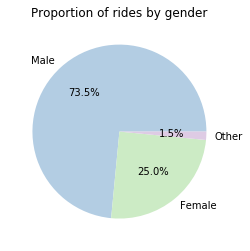

In [108]:
cmap= plt.get_cmap('Pastel1')
cmap = plt.cm.Pastel1
pastel_colors = cmap([1, 2, 3])
plt.pie(by_gender, labels=by_gender.index, autopct='%1.1f%%', colors= pastel_colors);
plt.title('Proportion of rides by gender');

<a id='age'></a>
#### Plot the number of rentals per age:

We will plot the frequency distribution by the age of the users.

In [109]:
df_riders.member_birth_year.describe()

count    1.753003e+06
mean     1.983088e+03
std      1.044289e+01
min      1.881000e+03
25%      1.978000e+03
50%      1.985000e+03
75%      1.991000e+03
max      2.000000e+03
Name: member_birth_year, dtype: float64

Calculate the age of the users from their year of birth:

In [110]:
df_riders['age']= 2018-df_riders.member_birth_year
df_riders.age.describe()

count    1.753003e+06
mean     3.491204e+01
std      1.044289e+01
min      1.800000e+01
25%      2.700000e+01
50%      3.300000e+01
75%      4.000000e+01
max      1.370000e+02
Name: age, dtype: float64

Note: A very small part of the data contains ages values that seem to be inaccurate (> 100). We will just ignore these entries. 

[     0.  50000. 100000. 150000. 200000. 250000. 300000. 350000. 400000.
 450000.]
[0.00000e+00 1.87380e+04 1.95301e+05 3.92717e+05 4.15661e+05 2.65387e+05
 1.66472e+05 1.09422e+05 8.67830e+04 5.77690e+04 2.62960e+04 1.06420e+04
 4.32700e+03 1.01900e+03 5.76000e+02 4.80000e+02 1.62000e+02 9.10000e+01
 1.80000e+01 2.66000e+02 1.40000e+01 8.31000e+02 0.00000e+00 3.00000e+00
 2.30000e+01] [ 10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90  95
 100 105 110 115 120 125 130 135]


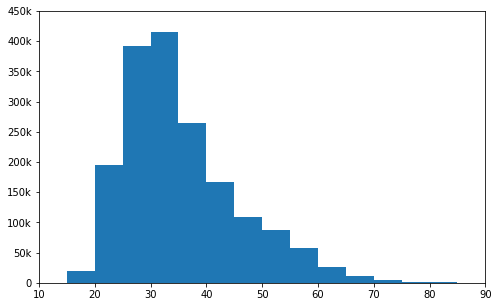

In [111]:
bins_x= np.arange(10, df_riders.age.max(), 5)
plt.figure(figsize=[8,5])
n, bins, patches= plt.hist(data=df_riders, x=df_riders.age, bins=bins_x);
plt.xlim(10, 90); # limit to 90 years
locs_y, labels_y= plt.yticks();
print(locs_y)
plt.yticks(locs_y, [0, "50k","100k", "150k", "200k", "250k", "300k", "350k","400k", "450k"]);
print(n, bins)

In [112]:
# Proportion of rentals by users between 25 and 35 years old:
(n[3]+n[4])/total_number_of_rides*100

46.113897123963845

In [113]:
# Proportion of rentals by users between 35 and 45:
(n[5]+n[6])/total_number_of_rides*100

24.635382825927852

#### Interpretation of the Plot:
The distribution of the age variable seems unimodal and approximately right skewed.
We can count the most rentals (more than 800 000 and about 46% of all) for users aged between 25 and 35 years old.
About twice as much as the number of rentals made by users between 35 and 45 years old.

<a id='usertype'></a>
#### Plot the Proportion of Customers vs. Subscribers and members of the "bike-share Program":

In [114]:
user_types= df_riders.user_type.value_counts()
user_types

Subscriber    1550759
Customer       202244
Name: user_type, dtype: int64

In [115]:
bike_share= df_riders.bike_share_for_all_trip.value_counts()
bike_share

No     1590672
Yes     162331
Name: bike_share_for_all_trip, dtype: int64

We will use 2 pie charts in the same plot:

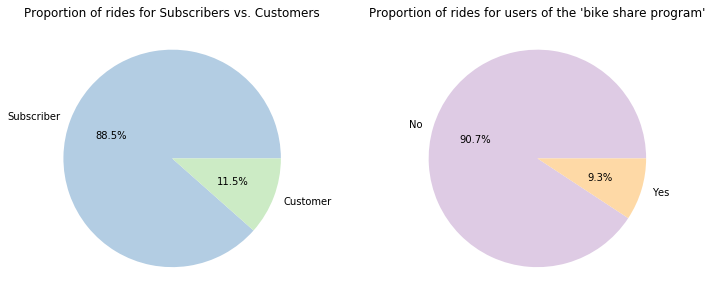

In [116]:
plt.figure(figsize=[12,5])
plt.subplot(1, 2, 1);
cmap= plt.get_cmap('Pastel1')
cmap = plt.cm.Pastel1
pastels_user_types = cmap([1, 2])
plt.pie(user_types, labels=user_types.index, autopct='%1.1f%%', colors= pastels_user_types);
plt.title('Proportion of rides for Subscribers vs. Customers');

plt.subplot(1,2,2);
pastels_bike_share= cmap([3,4])
plt.pie(bike_share, labels=bike_share.index, autopct='%1.1f%%', colors= pastels_bike_share);
plt.title('Proportion of rides for users of the \'bike share program\'');


In [117]:
df_Customers= df_riders.query('user_type == "Customer"')
df_Customers.query('bike_share_for_all_trip == "Yes"').shape

(0, 5)

None of the 'Customers' are member of the 'bike-share' Program.

In [118]:
df_Subscriber= df_riders.query('user_type == "Subscriber" and bike_share_for_all_trip == "Yes"')
print("Proportion of Subsbscribers using bike_share: ", df_Subscriber.shape[0]/\
                                                          user_types['Subscriber']*100)

Proportion of Subsbscribers using bike_share:  10.46784187613936


#### Interpration of the Plots:
Most of the Users ($88.5\%$) are <i>Subscribers</i> and about $10.5\%$ of them use the "bike-share" Program. Also, as we would expect, none of the <i>Customers</i> take part in this "bike_share" Program, that gives a pricing advantage for residents. <br><br>

### Conclusion on the Univariate Exploration:
[To Answer following questions: <br>
(1)"Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?"<br>
(2) "Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?"] <br>
<br>
Here are the most interesting insights we could gain about our variables of interest ("duration" and "pick-up time variables"):
- The distribution of the duration variable is extremly right skewed, meaning the values taken are spread along a very large range and the most common values are in the far-lower part of this range (between 5 and 10 minutes). We performed a logarithmic transform on the x-axis and discovered that the distribution looks approximately "log normal". We also could identify outliers, for a rental duration longer than 20 hours and found out an interesting tendency for these points: About 64% of the very few users, that rented a bike for longer than 20 hours, were "Customers", who represent only 11.5% of all the users, versus 88.5% of "Subscribers".
- The frequency distributions of the rides for the pick-up time variables show us several tendencies:<br>
    - the use of rentals seems to vary with the seasons. There is a decreasing use of rentals from Summer, Fall, Spring until Winter,<br>
    - the use of rentals seems to vary with the day within the week. The most heavy use of rentals happen from tuesday until thursday. The number of rentals significantly drop during the week-end.<br>
    - the use of rentals seems to vary with the hour within the day. The distribution looks bimodal, with two most common ranges observed, for the pick-up hours: one range in the morning, between 7am and 9 am and one in the afternoon/early evening, between 5pm and 7pm <br>
- In order to gain these "time related" insights, we had to clean the data ([see the cleaning plan](#clean)), to get date time objects from the strings contained in the "start/end-time" columns of the dataset. We also did some feature-engineering, to extract the different time variables of interests (months, weekdays, hour of the day) from the time-stamps.

[Back to Exploratory Analysis](#eda)<br>
[Back to Top](#top)

<a id='bivariate'></a> 
## Bivariate Exploration

- [Duration of the rides against "time units"](#durationvstime)
- [Duration of the rides against user characteristics](#durationvsuser)
- [Frequency of rides for user characteristics vs. time units](#uservstime)

<a id='durationvstime'></a>
### Plot the <i>average</i>  and <i>median</i> duration of the rentals against the measures in time, where the bikes were picked up 
- [Duration per months of the year](#durationmonths)
- [Duration per day of the week](#durationweekday)
- [Duration per hour of the day](#durationhour)

We will use Barcharts which are well adapted to compare the outcome values along the measures of time.

<a id='durationmonths'></a>
#### Plot the <i>average</i> and <i>median</i> duration for each month of the year:

In [119]:
# get the mean duration of the rentals by month
df_meanduration_by_month = df_time.groupby('month')['duration_min'].mean()
print(df_meanduration_by_month)

month
1     11.648000
2     12.009359
3     11.820219
4     12.299250
5     12.324168
6     13.233612
7     13.468337
8     12.911314
9     13.092471
10    12.135350
11    11.458613
12    11.758081
Name: duration_min, dtype: float64


In [120]:
ind= df_meanduration_by_month.idxmax()
ind

7

In [121]:
# get the median duration of the rentals by month
df_medianduration_by_month= df_time.groupby('month')['duration_min'].median()
print(df_medianduration_by_month)

month
1     8.0
2     8.0
3     8.0
4     8.0
5     8.0
6     9.0
7     9.0
8     9.0
9     9.0
10    9.0
11    8.0
12    8.0
Name: duration_min, dtype: float64


In [122]:
print(df_meanduration_by_month.index, months)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month') ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


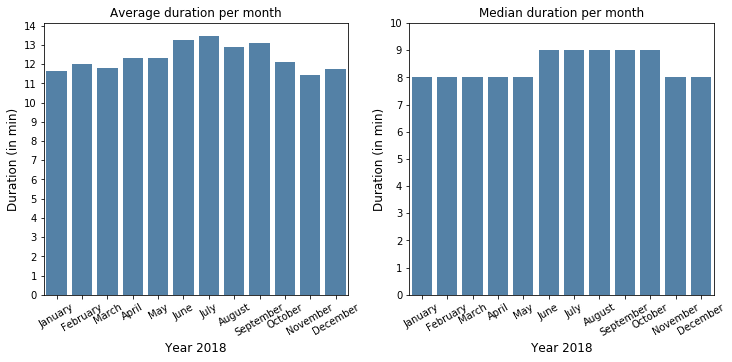

In [123]:
# Plot the mean duration of the rentals by month using seaborn's barplot function
plt.figure(figsize=[12,5]);
plt.subplot(1, 2, 1);
sns.barplot(df_meanduration_by_month.index, df_meanduration_by_month, color='steelblue');
plt.xlabel('Year 2018', fontdict={'fontsize':12});
plt.ylabel('Duration (in min)', fontdict={'fontsize':12});
plt.yticks(np.arange(0, 15), np.arange(0,15));
locs, labels= plt.xticks()
#print(locs, [lab.get_text() for lab in labels]);
plt.xticks(locs, labels=months, rotation= 30);
plt.title('Average duration per month');

# Plot the median duration of the rentals by month
plt.subplot(1,2,2);
sns.barplot(df_medianduration_by_month.index, df_medianduration_by_month, color='steelblue');
plt.xlabel('Year 2018', fontdict={'fontsize':12});
plt.ylabel('Duration (in min)', fontdict={'fontsize':12});
locs, labels= plt.xticks()
plt.xticks(locs, labels=months, rotation= 30);
plt.yticks(np.arange(0, 11), np.arange(0,11));
plt.title('Median duration per month');

#### Interpretation of the plot: 
In average, the duration of the rides do not vary much, along the months of the year. The plot is still unimodal though, with a maximum average duration of about 13.5 minutes in July. During the warmest months, from June until September, the average durations of the rides are the highest, about <b>13</b> minutes, versus <b> 11 to 12 </b> minutes in the coldest months of the year. <br>
Considering the median value of the duration, suppress the influence of the Outliers with very long duration time, on the average values. We observe an even tinyer variation of the median duration time by month, between <b>8</b> and <b>9</b> minutes. With a slight but clear increase from June until October.


<a id='durationweekday'></a>
#### Plot the average and median duration per day of the week:

weekday
0    11.585429
1    11.422699
2    11.583995
3    11.611420
4    12.132394
5    16.556199
6    16.522442
Name: duration_min, dtype: float64
weekday
0     8.0
1     8.0
2     8.0
3     8.0
4     9.0
5    10.0
6    10.0
Name: duration_min, dtype: float64


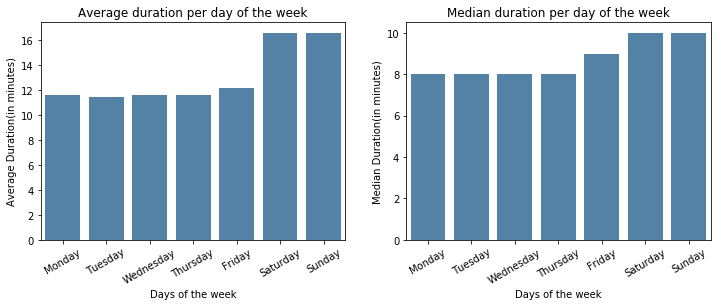

In [124]:
# plot the average duration per day of the week
plt.figure(figsize=[12,4]);
plt.subplot(1,2,1)
mean_duration_weekday= df_time.groupby('weekday')['duration_min'].mean()
print(mean_duration_weekday)
sns.barplot(mean_duration_weekday.index, mean_duration_weekday, color='steelblue');
# We use the 'days' list of weekday's names ordered from Monday until Sunday for the x-axis. 
# The mean_duration_weekday.index list is automatically sorted from 0 to 6, so the 'days' list \
# corresponds to the index.
plt.xticks(mean_duration_weekday.index, days, rotation=30);
plt.xlabel('Days of the week');
plt.ylabel("Average Duration(in minutes)");
plt.title('Average duration per day of the week');

#plot the median duration per day of the week
plt.subplot(1,2,2)
median_duration_weekday= df_time.groupby('weekday')['duration_min'].median()
print(median_duration_weekday)
sns.barplot(median_duration_weekday.index, median_duration_weekday, color='steelblue');
plt.xticks(mean_duration_weekday.index, days, rotation=30);
plt.xlabel('Days of the week');
plt.ylabel("Median Duration(in minutes)");
plt.title('Median duration per day of the week');

#### Interpretation of the Plot:
There is a very clear Increase of the duration time of the rides, when the day of rental falls on a week-end.
In average, a rental takes about <b>16.5 mins</b> during the week-end, and about <b>11.5 mins</b> on a week day. On Fridays, the duration is slightly higher, about<b>12 mins</b> than on the other working days.
The median values show exactly the same tendency but with less variation in the duration altogether. This is due to the presence of outliers for the duration variable, i.e.very long rentals, during week-end days for instance, that also count significant less rentals than the other days. This explains why the fluctuation between the values taken are bigger for the average durations than for the median durations.
The observed tendency remains the same for both values of center:<br>On working days, from monday until thursday, the median duration time of a rental is <b>8 mins</b>, slightly more on fridays with <b>9 mins</b> and <b>10 mins</b> on the week-end.

<a id='durationhour'></a>
#### Plot the mean and median duration by the pick-up hour of the day:

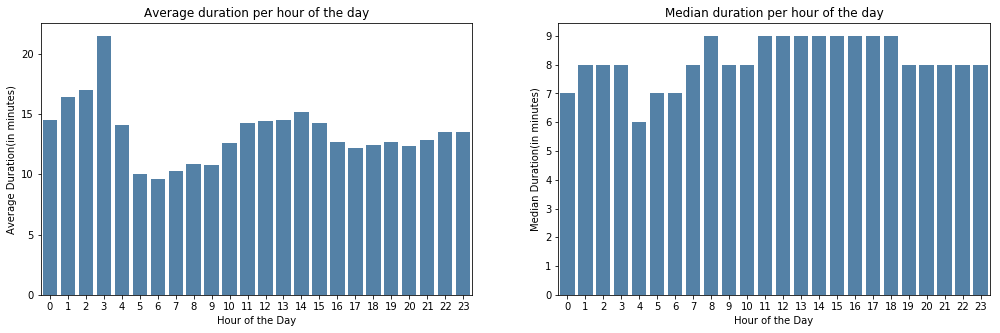

In [125]:
# Using the same method (Pandas's Groupby)as previously, to extract the average and median values
# per pick-up hour of the day.

# Plot the average duration of a trip by the pick-up hour within the day
plt.figure(figsize=[17,5]);
plt.subplot(1,2,1);
mean_duration_byhour= df_time.groupby('hour_of_day')['duration_min'].mean()
sns.barplot(mean_duration_byhour.index, mean_duration_byhour, color='steelblue');
plt.xlabel('Hour of the Day');
plt.ylabel("Average Duration(in minutes)");
plt.title('Average duration per hour of the day');

# Plot the median duration by each hour of the day
plt.subplot(1,2,2);
median_duration_byhour= df_time.groupby('hour_of_day')['duration_min'].median()
sns.barplot(median_duration_byhour.index, median_duration_byhour, color='steelblue');
y_ticks= np.arange(10);
plt.yticks(y_ticks, y_ticks);
plt.xlabel('Hour of the Day');
plt.ylabel("Median Duration(in minutes)");
plt.title('Median duration per hour of the day');


We want to investigate the peak at 3am for the mean duration!

In [126]:
df_3am= df_time[df_time.hour_of_day == 3]
df_3am.duration_min.describe()

count    1915.000000
mean       21.465274
std        73.803442
min         1.000000
25%         4.000000
50%         8.000000
75%        16.000000
max      1042.000000
Name: duration_min, dtype: float64

In [127]:
# Proportion of extreme long rides:
prop_longer_rides_3am= df_3am.query('duration_min > 100').shape[0]/df_3am.shape[0]*100
print('Longer rides for 3am subset(percents): ',prop_longer_rides_3am)

# same for the whole dataset
prop= df_allRides.query('duration_min >100').shape[0]/df_allRides.shape[0]*100
print('Longer rides for whole dataset(percents): ',prop)

Longer rides for 3am subset(percents):  2.715404699738903
Longer rides for whole dataset(percents):  0.5652015427241139


The 'peak' in the mean duration for rides that were picked-up at 3am, can be explained by a relative big proportion of outliers in this small subset of the data: 2.7% of these rides took longer than 100 minutes, compared to a proportion of only 0.6% for the whole dataset.

#### Interpretation of the plot:
We will concentrate on the Visualization of the median values, to eliminate the bias caused by the Outliers. We see that the longest rides occur at 8am and otherwise continuously between 11am and 6pm. During the evening and until early morning, the rides are shorter, with a noticeable drop at 4am in the morning with a median duration of only 6 minutes.


[Back to Bivariate Exploration](#bivariate)

<a id='durationvsuser'></a>
### Plot the duration by user characteristics:
- [Overview with violin plots](#durationcategorical)
- [Duration vs. Gender](#durationgender)
- [Duration vs. Age](#durationage)
- [Duration vs. Subscriber/Customer type and 'Bike-share-Program'](#durationusertype)

<a id='durationcategorical'></a>
#### Plot an overview of the duration distributions by gender, user-type and bike-share members using a violin plot:

For plotting these subsets of the duration distribution, we will have to use a logarithmic transform of the duration values to get a clearer picture. This is due to the shape of the duration distribution (see [Univariate exploration](#univariate)). For each violin subplot, we display the shape of the duration distribution, for each value of the categorical user characteristic on the x-axis.
Warning: these plots are time-consuming (about 20 seconds each to render)

In [128]:
# compute the logarithm of duration_min to make plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
# adding a 'log_duration' column to the dataset.
df_allRides['log_duration'] = df_allRides['duration_min'].apply(log_trans)

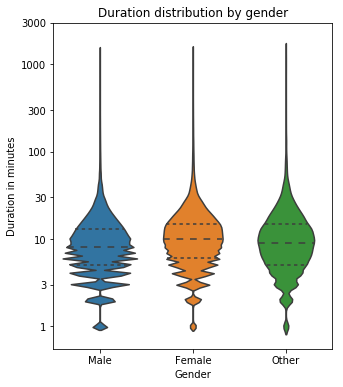

In [129]:
# duration distribution by gender
plt.figure(figsize=[5, 6]);
sns.violinplot(x='member_gender', y='log_duration', data=df_allRides, \
               order=['Male', 'Female', 'Other'], inner='quartile');

y_ticks= [1, 3, 10 ,30, 100 ,300, 1000, 3000]
plt.yticks(np.log10(y_ticks), y_ticks);
plt.xlabel('Gender');
plt.ylabel('Duration in minutes');
plt.title('Duration distribution by gender');

#### Interpretation:
We can notice a variation by gender in the distribution: Male users seem to use rentals for a shorter time than the female and other gendered users. The median value of the duration for male users is visibly lower than on the 2 other violin plots. Also there are more values lower than the median line in the first violin plot and the shape falls steeper towards the null (of frequencies) after the median line, than on the other violin plots.


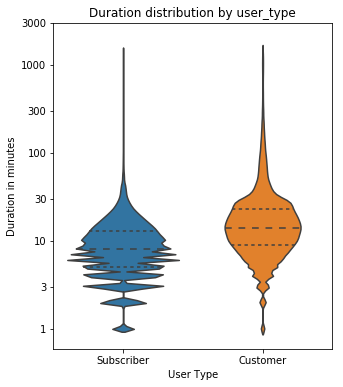

In [130]:
# duration distribution by user type
plt.figure(figsize=[5, 6]);
sns.violinplot(x='user_type', y='log_duration', data=df_allRides, inner='quartile');
y_ticks= [1, 3, 10 ,30, 100 ,300, 1000, 3000]
plt.yticks(np.log10(y_ticks), y_ticks);
plt.xlabel('User Type');
plt.ylabel('Duration in minutes');
plt.title('Duration distribution by user_type');

#### Interpretation: 
There is a big variation between the 2 user types: "Subscribers" seem to use rentals for an overall much shorter time than "Customers". The third quartile for the violin plot of the Subscribers, is about the same value, than the median of the second violin plot.


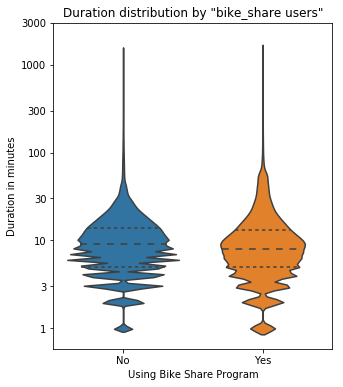

In [131]:
# duration distribution by bike_share users
plt.figure(figsize=[5, 6]);
sns.violinplot(x='bike_share_for_all_trip', y='log_duration', data=df_allRides, inner='quartile');
y_ticks= [1, 3, 10 ,30, 100 ,300, 1000, 3000]
plt.yticks(np.log10(y_ticks), y_ticks);
plt.xlabel('Using Bike Share Program');
plt.ylabel('Duration in minutes');
plt.title('Duration distribution by "bike_share users"');

#### Interpretation of the Plot:
There is a minor variation between the two violin plots: Users of the bike-share Program tend to use rentals for a slight shorter amount of time than People not using this program.

<a id='durationgender'></a>
#### Plot the Distribution of Duration time by Gender using faceting:

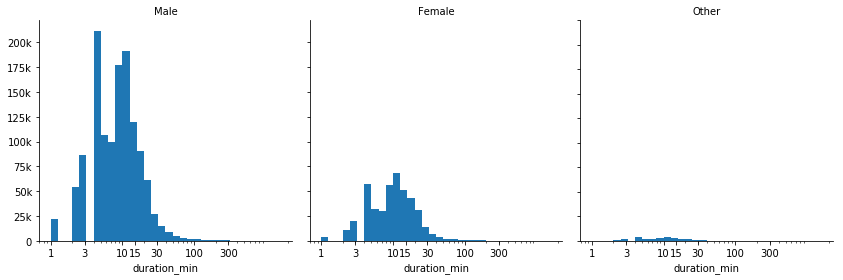

In [132]:
# Use facetting for plotting the duration distribution by gender
# We will use a log transformation on the x-axis (see [Univariate exploration])
bin_edges = 10 ** np.arange(np.log10(df_allRides.duration_min.min()), \
                            np.log10(df_allRides.duration_min.max())+0.1,0.1)

ticks=[1, 3, 10, 15, 30, 100, 300]
labels=['{}'.format(v) for v in ticks]

g = sns.FacetGrid(df_allRides, col='member_gender', height=4)
g.map(plt.hist, 'duration_min', bins=bin_edges);
g.set(xscale='log')
g.set_titles('{col_name}')
plt.xticks(ticks, labels);
yticks, ylabels= plt.yticks()
plt.yticks(yticks, [0, "25k", "50k", "75k", "100k", "125k", "150k", "175k", "200k"]);

A Facet is not appropriate for comparing the distributions, as it uses the same scale for the frequency values, for each level of the variable we facet the distribution with (Gender= [Male, Female, Other]). But the 3 levels present very different scales of frequencies.

Let us plot the three levels independently:

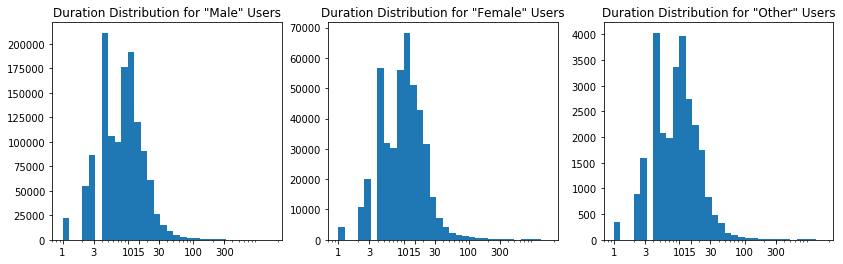

In [133]:
# Plot the Duration distribution for Male users:
plt.figure(figsize=[14,4])
plt.subplot(1,3,1)
bin_log= 10 ** np.arange(np.log10(df_allRides.duration_min.min()), np.log10(df_allRides.duration_min.max())+0.1, 0.1)
df_malegender= df_allRides.loc[df_allRides.member_gender == "Male"]
plt.hist(data=df_malegender, x='duration_min', bins=bin_log)
plt.xscale('log')
plt.xticks([1, 3, 10, 15, 30, 100, 300], [1, 3, 10, 15, 30, 100, 300]);
plt.title('Duration Distribution for "Male" Users');

# Plot the Duration distribution for Female users:
plt.subplot(1,3,2)
bin_log= 10 ** np.arange(np.log10(df_allRides.duration_min.min()), np.log10(df_allRides.duration_min.max())+0.1, 0.1)
df_femalegender= df_allRides.loc[df_allRides.member_gender == "Female"]
plt.hist(data=df_femalegender, x='duration_min', bins=bin_log)
plt.xscale('log')
plt.xticks([1, 3, 10, 15, 30, 100, 300], [1, 3, 10, 15, 30, 100, 300]);
plt.title('Duration Distribution for "Female" Users');

# Plot the Duration distribution for Other users:
plt.subplot(1,3,3); 
bin_log= 10 ** np.arange(np.log10(df_allRides.duration_min.min()), np.log10(df_allRides.duration_min.max())+0.1, 0.1)
df_thirdgender= df_allRides.loc[df_allRides.member_gender == "Other"]
plt.hist(data=df_thirdgender, x='duration_min', bins=bin_log)
plt.xscale('log')
plt.xticks([1, 3, 10, 15, 30, 100, 300], [1, 3, 10, 15, 30, 100, 300]);
plt.title('Duration Distribution for "Other" Users');

The Form of the Distribution looks pretty much the same for the three genders. The main difference lies in the frequency values, which are reflecting the proportion of each of the 3 gender values in the dataset (Men: 73.5%, Female:25%, Other:1.5%)

#### Plot the mean and median Duration by Gender using barcharts:

member_gender
Female    14.533820
Male      11.738490
Other     13.993538
Name: duration_min, dtype: float64
member_gender
Female    10.0
Male       8.0
Other      9.0
Name: duration_min, dtype: float64


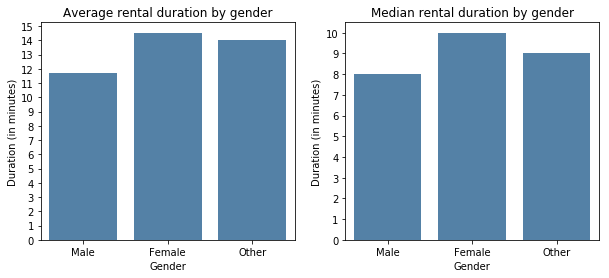

In [134]:
plt.figure(figsize=[10,4]);
# mean duration by gender
plt.subplot(1,2,1)
mean_gender= df_allRides.groupby(['member_gender'])['duration_min'].mean()
print(mean_gender)
sns.barplot(mean_gender.index, mean_gender, order=['Male', 'Female', 'Other'], color='steelblue');
plt.yticks(np.arange(0, 16), np.arange(0, 16));
plt.ylabel('Duration (in minutes)');
plt.xlabel('Gender');
plt.title('Average rental duration by gender');

# median duration by gender
plt.subplot(1,2,2)
median_gender= df_allRides.groupby(['member_gender'])['duration_min'].median()
print(median_gender)
sns.barplot(median_gender.index, median_gender, order=['Male', 'Female', 'Other'], color='steelblue');
plt.yticks(np.arange(0, 11), np.arange(0, 11));
plt.ylabel('Duration (in minutes)');
plt.xlabel('Gender');
plt.title('Median rental duration by gender');

#### Interpretation of the plot:
We observe the following tendency: Women and "Other"-gendered users seem to use rentals for a longer time in average (around <b>14 minutes</b> both) than Men ( about <b>12 mins</b>).
Looking at the median value, we see the same tendency and a clearer variation between all three genders: the duration time is the longest for women (<b>10 minutes</b>) and 'others'(<b>9 minutes</b>) and shortest for men (<b>8 minutes</b>).

<a id='durationage'></a>
#### Plot the duration by age of the users:

We first add a new column to the dataset holding the age of each user.

In [135]:
df_allRides['age']= 2018-df_allRides.member_birth_year

In [136]:
df_allRides['age'].describe()

count    1.753003e+06
mean     3.491204e+01
std      1.044289e+01
min      1.800000e+01
25%      2.700000e+01
50%      3.300000e+01
75%      4.000000e+01
max      1.370000e+02
Name: age, dtype: float64

Note on outliers for the age variable:<br>Some values for the age of the users exceed 100 years (the maximum age value is 137 years!) which is obviously an accuracy issue (probably an intended choice of the user not to give their real age). Instead of arbitrarily making the choice of truncating the value to a "realistic" upper limit of age, we chose to keep these very few values.

Choosing the type of plot:
Since the two variables we are looking at, are numerical, we can use a scatterplot to gain an overview of the points described by the duration of the rental on the x-axis and the age of the user on the y-axis. 

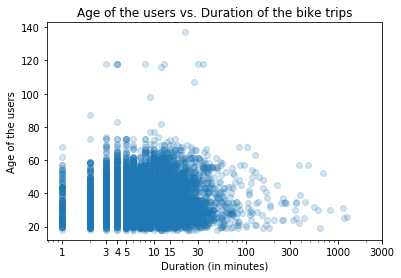

In [137]:
# Plot the duration sample distribution by age of the users with a scatterplot.
df_samp= df_allRides.sample(10000); # picking a sample of 10 000 rentals.
# we use a log transform on the x-axis so the bins need to be chosen, so that we still have minutes
# as units.
bins_x= 10 ** np.arange(np.log10(df_allRides.duration_min.min()),\
                                 np.log10(df_allRides.duration_min.max())+0.3, 0.3)
plt.scatter(x='duration_min', y='age', alpha=1/5, data=df_samp)
plt.xlabel('Duration (in minutes)');
plt.ylabel('Age of the users');
plt.title('Age of the users vs. Duration of the bike trips');

plt.xscale('log')
plt.xticks([1,3, 4, 5, 10, 15,30,100,300,1000,3000], [1, 3,4, 5,10, 15, 30,100,300,1000,3000]);

#### Interpretation of the Plot:
We can observe that the age of the users, approximately equally ranges from 20 until about 60, for the rentals of most common duration(from 1 minute until about 30 minutes). We also see, that for rentals' duration longer than 30 minutes, the age of the users decreases, when the duration increases.<br> This does not show any strong relationship between the two variables.
We will introduce and use a new categorical variable, to group the ages in age levels and plot the duration values of center against these to try and find out more:

#### Plot the average and median duration of the trips, against the age levels of the users: 

In [138]:
# Add an age category variable using the pandas.cut function:

age_levels= ['18-19', '20s', '30s', '40s', '50s', '60s', 'elderly']

bins= [18, 20, 30, 40, 50, 60, 70, df_allRides['age'].max()+1]
df_allRides['age_level']= pd.cut(df_allRides['age'], bins=bins, labels=age_levels, include_lowest=True)


In [139]:
# test the new created column
df_allRides['age_level'].value_counts()

20s        671027
30s        615016
40s        263111
50s        128588
18-19       38565
60s         29863
elderly      6833
Name: age_level, dtype: int64

In [140]:
df_allRides.age_level.isna().sum()

0

In [141]:
mean_duration_per_age_level= df_allRides.groupby(['age_level'])['duration_min'].mean()
mean_duration_per_age_level

age_level
18-19      15.993906
20s        12.642162
30s        11.943265
40s        12.315680
50s        13.230846
60s        13.269430
elderly    11.599005
Name: duration_min, dtype: float64

In [142]:
median_duration_per_age_level= df_allRides.groupby(['age_level'])['duration_min'].median()
median_duration_per_age_level

age_level
18-19      8.0
20s        9.0
30s        8.0
40s        8.0
50s        9.0
60s        9.0
elderly    8.0
Name: duration_min, dtype: float64

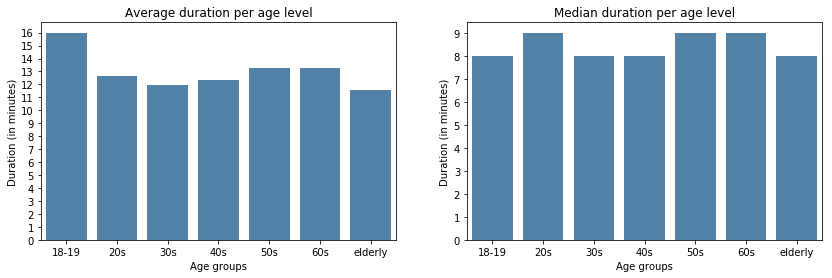

In [143]:
# Plot average and median duration vs. age levels
plt.figure(figsize=[14, 4]);
plt.subplot(1,2,1);
sns.barplot(mean_duration_per_age_level.index, mean_duration_per_age_level, order=age_levels, color='steelblue');
plt.yticks(np.arange(17), np.arange(17)); # since the biggest value is about 16, we set the 
# ticks on the y axis from 0 to 16
plt.xlabel('Age groups');
plt.ylabel('Duration (in minutes)');
plt.title('Average duration per age level');

plt.subplot(1,2,2);
sns.barplot(median_duration_per_age_level.index, median_duration_per_age_level, order=age_levels, color='steelblue');
plt.yticks(np.arange(10), np.arange(10));
plt.xlabel('Age groups');
plt.ylabel('Duration (in minutes)');
plt.title('Median duration per age level');

#### Interpretation of the Plot:
When considering the median duration per age_level, we observe a few variation (between <b>8</b> and <b>9</b> minutes), through the age levels. A longer duration of rides is observe for the age group of 20's, as well as for the groups of 50's and 60's year old users.<br>

The higher average duration of rides for the youngest category of users, "18-19" years old, is probably explained by a higher Proportion of longer durations in this group,than in the other groups.
We will try to verify this hypothesis:

In [144]:
# number of entries in each group:
df_grouped = df_allRides.groupby(['age_level'])['duration_min'].size()
df_grouped


age_level
18-19       38565
20s        671027
30s        615016
40s        263111
50s        128588
60s         29863
elderly      6833
Name: duration_min, dtype: int64

In [145]:
# Number of entries with a duration time longer than 20 minutes in each group
df_outliers= df_allRides.query('duration_min > 20')
df_grouped_duration = df_outliers.groupby('age_level').size()
df_grouped_duration

age_level
18-19       6569
20s        68820
30s        52077
40s        27029
50s        15709
60s         3734
elderly      737
dtype: int64

In [146]:
# proportion in percents of entries of duration bigger than 20 min. in each group
df_prop = df_grouped_duration/df_grouped*100
df_prop

age_level
18-19      17.033580
20s        10.255921
30s         8.467585
40s        10.272851
50s        12.216537
60s        12.503767
elderly    10.785892
dtype: float64

In [147]:
# average duration time for all ages
df_allRides.duration_min.mean()

12.471499478323768

The proportion of rides exceeding 20 minutes (which is much longer than the average duration of rides (about 12.5 mins through all ages), is clearly higher in the youngest Category of users (about 17%), than in all other age categories (from about 8% to 12%), which significantly influences the outcome of the average duration in this group.

[Back to Exploratory Data Analysis](#eda)

<a id='durationusertype'></a>
#### Plot the average and median duration for both Subscriber/Customer and Bike-share-program variables:
<i>We already could depict a strong relationship between the duration variable and the users' type ('Subscriber' vs. 'Customer')in the violin plot overview. We intend to get a finer look at this assumption with the following plots:</i>

In [148]:
# average duration for Subscriber/Customer variable:
mean_duration_usertype= df_allRides.groupby(['user_type'])['duration_min'].mean()
mean_duration_usertype

user_type
Customer      26.376337
Subscriber    10.658084
Name: duration_min, dtype: float64

In [149]:
# median duration for Subscriber/Customer variable:
median_duration_usertype= df_allRides.groupby(['user_type'])['duration_min'].median()
median_duration_usertype

user_type
Customer      14.0
Subscriber     8.0
Name: duration_min, dtype: float64

In [150]:
#average and median duration for Bike-share_program users
mean_bike_share= df_allRides.groupby(['bike_share_for_all_trip'])['duration_min'].mean()
mean_bike_share

bike_share_for_all_trip
No     12.503644
Yes    12.156514
Name: duration_min, dtype: float64

In [151]:
median_bike_share= df_allRides.groupby(['bike_share_for_all_trip'])['duration_min'].median()
median_bike_share

bike_share_for_all_trip
No     9.0
Yes    8.0
Name: duration_min, dtype: float64

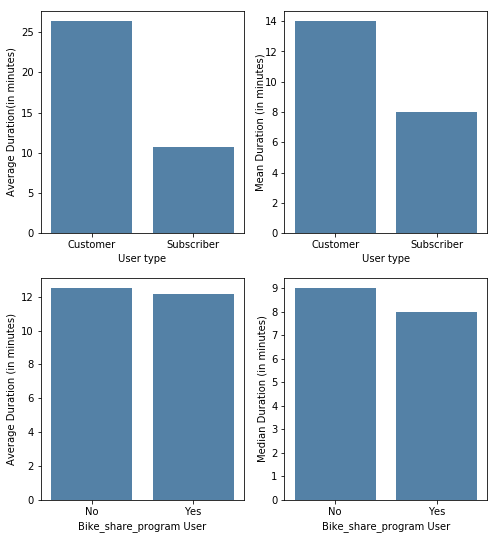

In [152]:
# creating the 4 plots using barcharts
fig= plt.figure(figsize=[8, 9])
plt.subplot(2,2,1)
sns.barplot(mean_duration_usertype.index, mean_duration_usertype, color='steelblue')
plt.ylabel('Average Duration(in minutes)');
plt.xlabel('User type')

plt.subplot(2,2,2)
sns.barplot(median_duration_usertype.index, median_duration_usertype, color='steelblue')
plt.ylabel('Mean Duration (in minutes)', labelpad= -1);
plt.xlabel('User type');

plt.subplot(2,2,3)
sns.barplot(mean_bike_share.index, mean_bike_share, color='steelblue')
plt.ylabel('Average Duration (in minutes)');
plt.xlabel('Bike_share_program User');

plt.subplot(2,2,4)
sns.barplot(median_bike_share.index, median_bike_share, color='steelblue')
plt.ylabel('Median Duration (in minutes)');
plt.xlabel('Bike_share_program User');
plt.yticks(np.arange(10), np.arange(10));

#### Interpretation of the plots:
We can focus on the plots relative to the median value of the duration, not affected by the proportion of Outliers in each of the 2 variables we are looking at:<br>
It is very clear that the median duration of the rentals made by Subscribers is much less, <b>8 minutes</b>, than for those made by Customers <b>14 minutes</b>.<br>For members of the "Bike-Share-Program", the median duration is just slightly less, <b> 8 minutes</b>, than for those who are <i>not</i> in the program, <b>9 minutes</b>. The variation here, is small, since a lot of rentals not belonging to the bike-share-program, are still made by Subscribers (If we remember the [Univariate Exploration](#univariate), we found out that 88.5% of the rentals are made by Subscribers), for which the median duration of a trip is <b>8 minutes</b>.


[Back to Exploratory Data Analysis](#eda)

<a id='uservstime'></a>
### Plot frequencies of rentals per user variables and time units:

#### User variables we choose to inspect:
[Gender, Age_levels, User-type(subscriber/customer]

#### Time units:
[months, days of the week, hours of the day]

- [Frequencies of rentals per gender and time units](#gendertime)
- [Frequencies of rentals per age_level and time units](#ageleveltime)
- [Frequencies of rentals per user type and time units](#subscribertime)

We use the dataframe we created previously (see [Univariate Exploration](#rentalsvstime)), containing all the needed time-related columns:

In [153]:
df_time.columns

Index(['start_time', 'end_time', 'duration_min', 'month', 'month_name', 'day',
       'date', 'weekday', 'weekday_name', 'holiday', 'is_weekend',
       'hour_of_day'],
      dtype='object')

Let us add the categorical user variables we need, from the global dataframe:

In [154]:
df_allRides.columns

Index(['duration_min', 'age_level', 'bike_id', 'bike_share',
       'bike_share_for_all_trip', 'date', 'day', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'end_station_name',
       'end_time', 'gender', 'holiday', 'hour_of_day', 'is_weekend',
       'member_birth_year', 'member_gender', 'month', 'month_name',
       'start_station_id', 'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'start_time', 'user_type', 'weekday',
       'weekday_name', 'time_delta', 'log_duration', 'age'],
      dtype='object')

In [155]:
df_time['gender']= df_allRides['member_gender']
df_time['age_level']= df_allRides['age_level']
df_time['user_type']= df_allRides['user_type']
df_time['bike_share']= df_allRides['bike_share_for_all_trip']

In [156]:
df_time.columns

Index(['start_time', 'end_time', 'duration_min', 'month', 'month_name', 'day',
       'date', 'weekday', 'weekday_name', 'holiday', 'is_weekend',
       'hour_of_day', 'gender', 'age_level', 'user_type', 'bike_share'],
      dtype='object')

<a id='gendertime'></a>
#### Plot number of rentals per gender for every month of the year: 
To create this plot and the following ones, we will make use of clustered barcharts with which we can introduce a cluster of bars for each level of a second nominal variable (here 'gender'), for each value of a first ordinal variable (here the months of the year 2018).
The y-axis represents the counts of each bar.

In [157]:
# set a grid to better see the count values for each bar
sns.set(style='whitegrid')

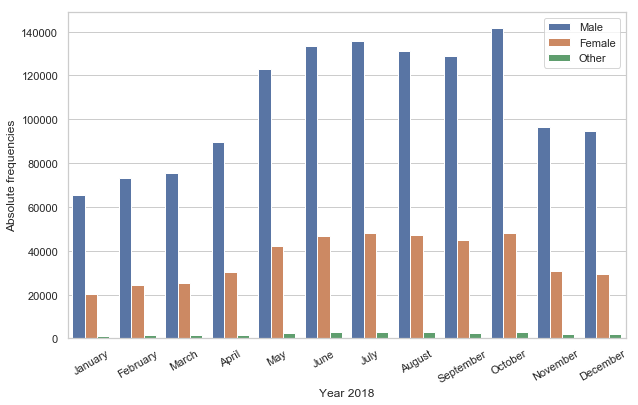

In [158]:
# use seaborn's countplot function to plot the counts for the 2 categorical variables
plt.figure(figsize=[10,6]);
sns.countplot(data=df_time, x='month', hue='gender');
plt.xticks(np.arange(12), labels= months, rotation=30);
plt.xlabel('Year 2018');
plt.ylabel('Absolute frequencies');
plt.legend(loc='best');

#### Note: 
Because of the big scale differences within the gender variable (there are much more male users than female or other gendered users), we rather want to display the <i>Proportions</i> of users for each Gender, along the months of the year. This should be easyier to read especially for the 'Other' gender with the least number of users.<br> 
So for each gender, the bars for all  values on the x-axis, should add to 100%. 

In [159]:
# get proportions for each gender, along all months of the years 
gender_props_bymonth = (df_time.groupby(['gender'])['month']
                     .value_counts(normalize=True)# get proportions instead of counts
                     .rename('percentage')
                     .mul(100) # get percents
                     .reset_index())
gender_props_bymonth.sort_values('month', inplace=True)
gender_props_bymonth.reset_index(inplace=True, drop=True)
print(gender_props_bymonth.head())
print(gender_props_bymonth.describe())

   gender  month  percentage
0   Other      1    4.412688
1    Male      1    5.085689
2  Female      1    4.627293
3    Male      2    5.672607
4  Female      2    5.526029
          month  percentage
count  36.00000   36.000000
mean    6.50000    8.333333
std     3.50102    2.340514
min     1.00000    4.412688
25%     3.75000    6.363471
50%     6.50000    8.280713
75%     9.25000   10.559973
max    12.00000   11.665005


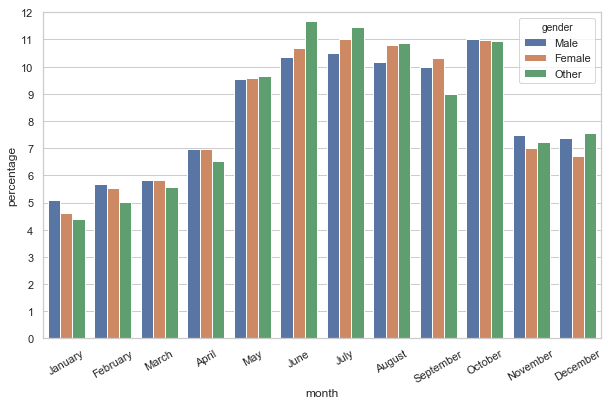

In [160]:
fig=plt.figure(figsize=[10,6]);
p = sns.barplot(x="month", y="percentage", hue="gender", data=gender_props_bymonth, hue_order= \
                ['Male', 'Female', 'Other']);
#plt.grid(b=True, which='major', axis='y', color='grey', alpha=1/5)
locs, labs= plt.xticks();
plt.xticks(ticks=locs, labels=months, rotation=30);
plt.yticks(np.arange(13), np.arange(13));# set the y-axis values from 0 to 12 percents
plt.ylim(0,12);


#### Interpretation:
We observe the same ditribution than the univariate distribution of rentals by months, for each gender group (see [Univariate Exploration](#month)). <br>We can observe a few variations between the 3 groups: 
The Proportions of users for a specific gender takes their maximum, each at a different month of the year:
Users of 'Other' gender rent a maximum number of bikes during the month of <b>June</b>.
The biggest Proportion of Female users is observed during the month of <b>July</b>.
While Male Users mostly rent a bike during the month of <b>October</b>.<br>
We can also see how the 3 groups vary in relation to one another: there are clearly more rentals picked-up by 'other' gendered users, in proportion, during the month of June and July, than by the two other groups. Women rent more bikes in proportion during the month of september than the other groups. While men pick-up rentals more than the 2 others during January and February.

#### Plot proportions of rentals for each day of the week and each hour of the day, for each gender group:

   gender weekday_name  percentage
0  Female      Tuesday   17.265786
1  Female    Wednesday   16.905606
2  Female     Thursday   16.793236
3  Female       Monday   15.937210
4  Female       Friday   15.151757


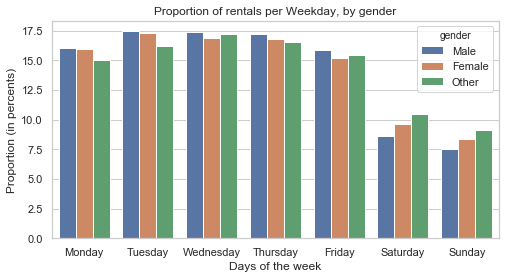

In [161]:
# plot proportions of rentals for each day of the week, for each gender group
plt.figure(figsize=[8,4])
gender_props_byday= (df_time.groupby(['gender'])['weekday_name']
                                    .value_counts(normalize=True) #get proportions
                                    .rename('percentage')
                                    .mul(100)
                                    .reset_index())
print(gender_props_byday.head())
sns.barplot(x='weekday_name', y='percentage', hue='gender', order=days, data=gender_props_byday,\
            hue_order=['Male', 'Female', 'Other']);
            # we use the same hue_order than for the previous plot for consistency
plt.title('Proportion of rentals per Weekday, by gender');
plt.xlabel('Days of the week');
plt.ylabel('Proportion (in percents)');

#### Interpretation:
Most of 'Male' and 'Female' users rent a bike on Tuesdays. 'Other' users mostly pick up rentals on Wednesdays. We observe the same distribution among the days of the week for each gender group, than in the univariate distribution of rentals per day of the week (Main use of rentals from Tuesday to Thursday, a bit less on Monday and Friday, significantly less rentals during the week-end. See [Univariate Distribution](#weekday)). There are more men using rentals from Monday until Friday, than the two other groups. On the week-end, we can observe the opposite tendency, in proportion.

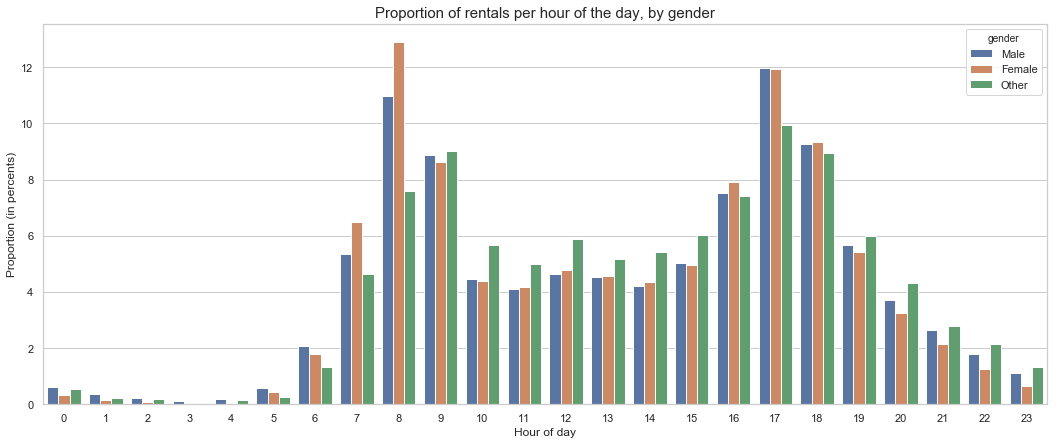

In [162]:
# plot proportions of rentals for each hour of the day, for each gender group 
fig= plt.figure(figsize=[18, 7]);
gender_props_byhour= (df_time.groupby(['gender'])['hour_of_day']
                                      .value_counts(normalize=True)
                                      .rename('percentage')
                                      .mul(100)
                                      .reset_index()
                                      .sort_values('hour_of_day'))
sns.barplot(x='hour_of_day', y='percentage', hue='gender', hue_order=['Male', 'Female', 'Other'], \
            data= gender_props_byhour);
plt.xlabel('Hour of day');
plt.ylabel('Proportion (in percents)');
plt.title('Proportion of rentals per hour of the day, by gender', fontdict={'fontsize':15});

#### Interpretation of the plots: 
We observe that all three levels of the gender variable share the shape of the univariate distribution of rentals per hour of day (see [Univariate Exploration](#hourofday)). The shape is bimodal with two peaks from 7 to 9am and 4 to 6pm. The most common pick-up hour for "Female" users is 8am, while "Male" and "Other" users mostly pick-up rentals at 5pm.<br>
We also notice that the distribution for the users of "Other" gender is flatter than the other two. The peaks are lower and the proportions between them and after the second peak are bigger than for the 2 other groups.

[Back to Bivariate](#bivariate)

<a id='ageleveltime'></a>
#### Plot the frequencies of rentals for each month of the year, for each  age_level:

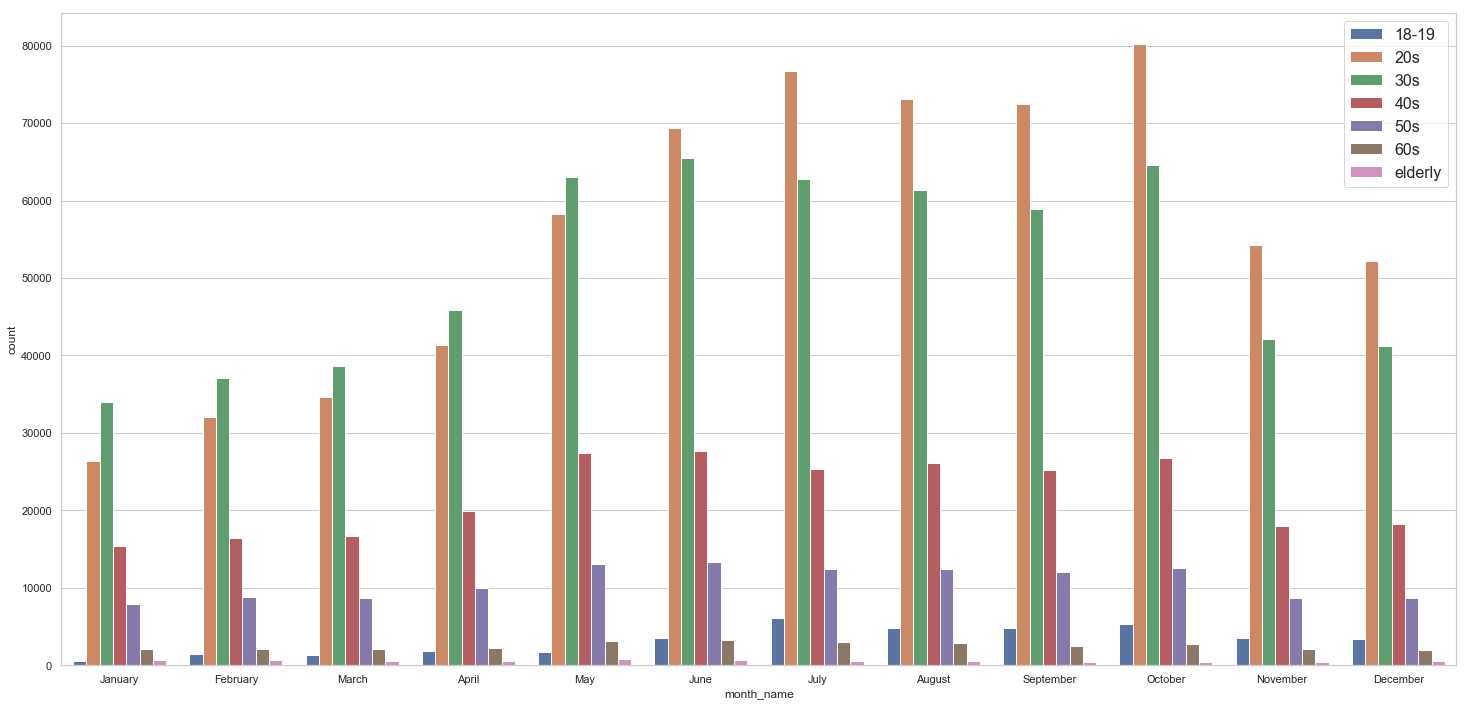

In [163]:
fig= plt.figure(figsize=[25,12]);
sns.countplot(data=df_time, x= 'month_name', order= months, hue='age_level')
plt.legend(fontsize=16);

Counting the absolute frequencies per age, we clearly see that the main users of the rentals are in their 20's and 30's.<br>
To get a better idea of the variation per month, at every age-level, we will next plot the proportions of rentals, using the faceting technique and first facet by months, plotting a bar for each age category:

In [164]:
# proportions by age for months of the year
age_bymonth= (df_time.groupby(['age_level'])['month_name']
                            .value_counts(normalize=True)
                            .rename('percentage')
                            .mul(100)
                            .reset_index())
print(age_bymonth.head())

  age_level month_name  percentage
0     18-19       July   15.874498
1     18-19    October   13.947880
2     18-19     August   12.615065
3     18-19  September   12.430961
4     18-19   November    9.194866


In [165]:
df_time.age_level.dtype

CategoricalDtype(categories=['18-19', '20s', '30s', '40s', '50s', '60s', 'elderly'], ordered=True)

The age-level variable is ordered, categorical. So the proportions will be plotted from the youngest to the oldest category.

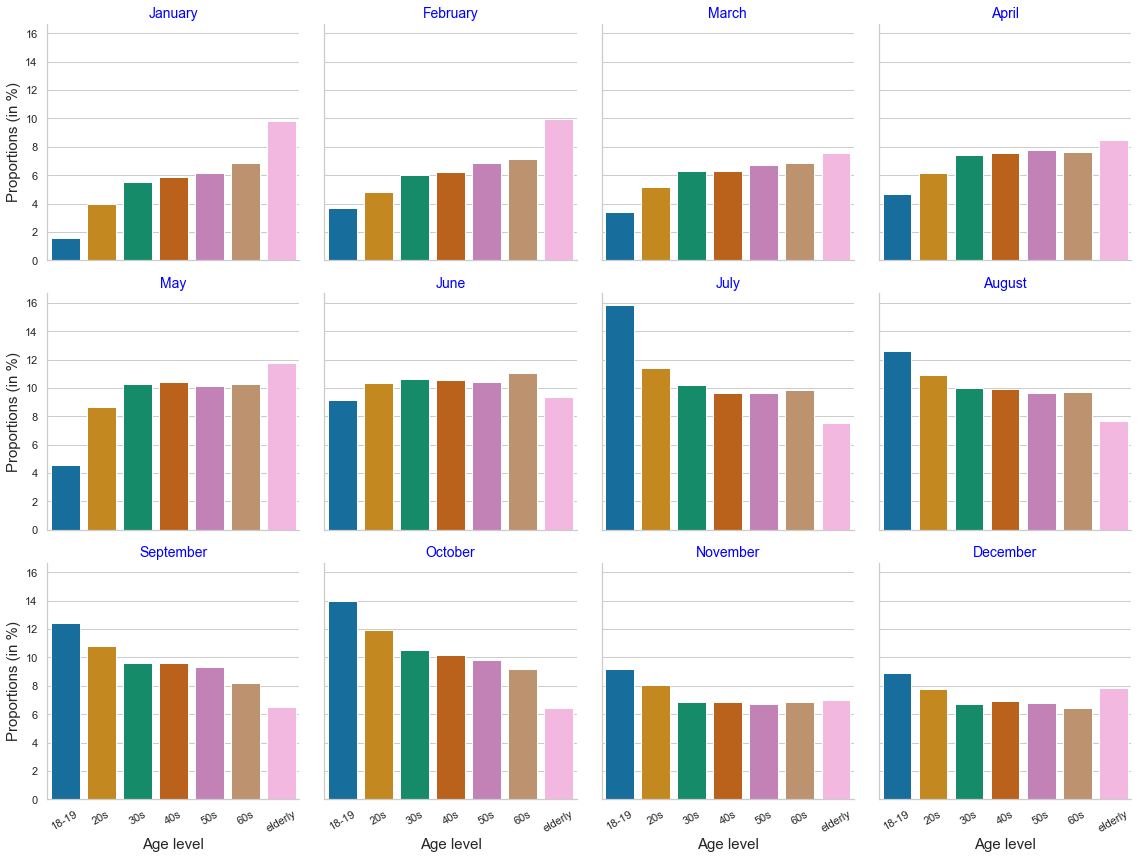

In [166]:
# We use a custom function as a wrapper to seaborn's barplot, this enables us to tweak
# the ticks rotation
def barplot_wrapper(x, y, **kwargs):
    sns.barplot(x=x, y=y, **kwargs)
    plt.xlabel('Age level');
    locs, labs= plt.xticks();
    plt.xticks(ticks=locs, labels=labs, rotation=30);
    

g= sns.FacetGrid(data=age_bymonth, col='month_name', col_order=months, col_wrap=4, height=4)
fig= g.map(barplot_wrapper, 'age_level', 'percentage', palette= sns.color_palette('colorblind'));
fig.set_titles('{col_name}', color='blue', size=14);
fig.set_xlabels('Age level', fontdict={'fontsize': 15});
fig.set_ylabels('Proportions (in %)', fontdict={'fontsize': 15});

#### Interpretation:
With this Visualization, we can compare the proportions of rental users in each age level, along the year. We observe following tendencies:
- the proportions level seem to increase across all categories with the age, from January until May (in other words: the older the users, the bigger the proportion in each age category, for this time period)
- From July until October, we observe the opposite tendency: the younger the users, the bigger the proportions in each age category
- the distributions of the proportions across all age levels are approximately uniform during the months of June

We could also facet the Proportions of users by month, with the age level. Thus comparing the shape of the distributions across the all levels:

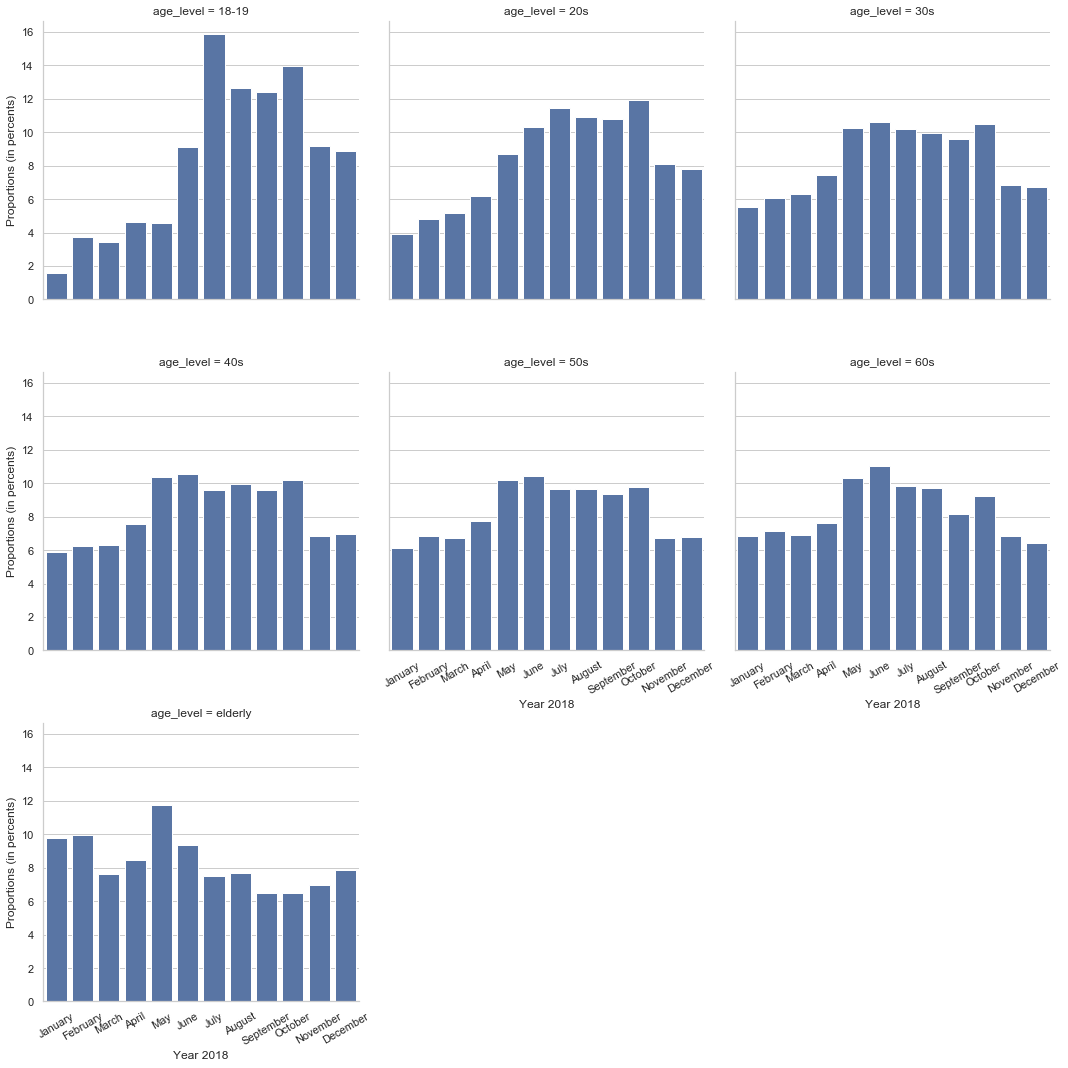

In [167]:
g= sns.FacetGrid(data=age_bymonth, col='age_level', col_wrap=3, height= 5);
g= g.map(barplot_wrapper, 'month_name', 'percentage', order= months);
g.set_xlabels('Year 2018');
g.set_ylabels('Proportions (in percents)');

#### Interpretation:
We observe the most variations in the monthly proportions of rentals for the two youngest categories of users. For 18 to 19 years old, the distribution looks bimodal, with two peaks in July and October (about 16% and 14%) and the smallest proportions of rentals, across all age levels, between January and May (lower than 2% to about 4.5%).<br>The monthly proportions of rentals seem about equally distributed between the 30s and 60s age decades categories.

#### Plot the proportions of rentals, for each day of the week, for each age_level.

We'll use a clustered bar chart:

  age_level weekday_name  percentage
0     18-19       Friday   15.337741
1     18-19     Thursday   15.011020
2     18-19    Wednesday   14.904706
3     18-19       Monday   14.707636
4     18-19      Tuesday   14.585764


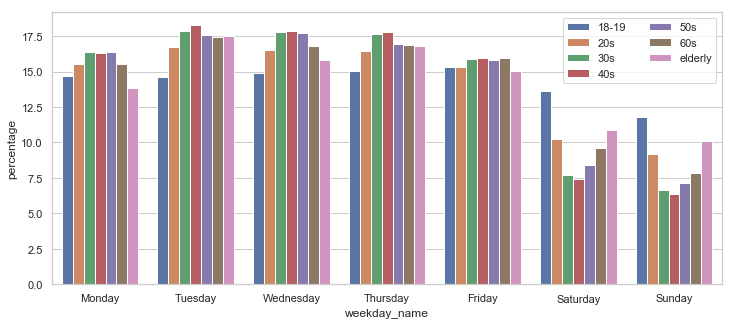

In [168]:
plt.figure(figsize=[12,5])
age_prop_byweekday= (df_time.groupby(['age_level'])['weekday_name']
                                    .value_counts(normalize=True)
                                    .rename('percentage')
                                    .mul(100)
                                    .reset_index())
print(age_prop_byweekday.head())
sns.barplot(x='weekday_name', y='percentage', hue='age_level', order=days, \
            data=age_prop_byweekday);
plt.legend(loc='upper right', ncol=2);

#### Interpretation:
We observe the same tendency across all age levels than in the univariate frequency distribution of the rentals per day (see [Univariate Exploration](#weekday)). (Biggest proportions of rentals from Tuesday to Thursday, a bit less on Monday and Friday. A drop in the proportions on the week-ends).<br>
A further information we get from this chart, is that the youngest and the oldest users use more rentals, in proportion, during the week-end, than the users belonging to all the other age categories.  

#### Plot the proportions of rentals, for each hour of the day, for each age_level:

We will use barcharts, plotting proportions for each hour of the day, faceted by the age-levels.

  age_level  hour_of_day  percentage
0     18-19           17    9.819785
1     18-19           16    8.087644
2     18-19           18    8.035784
3     18-19           15    7.413458
4     18-19           13    7.078958


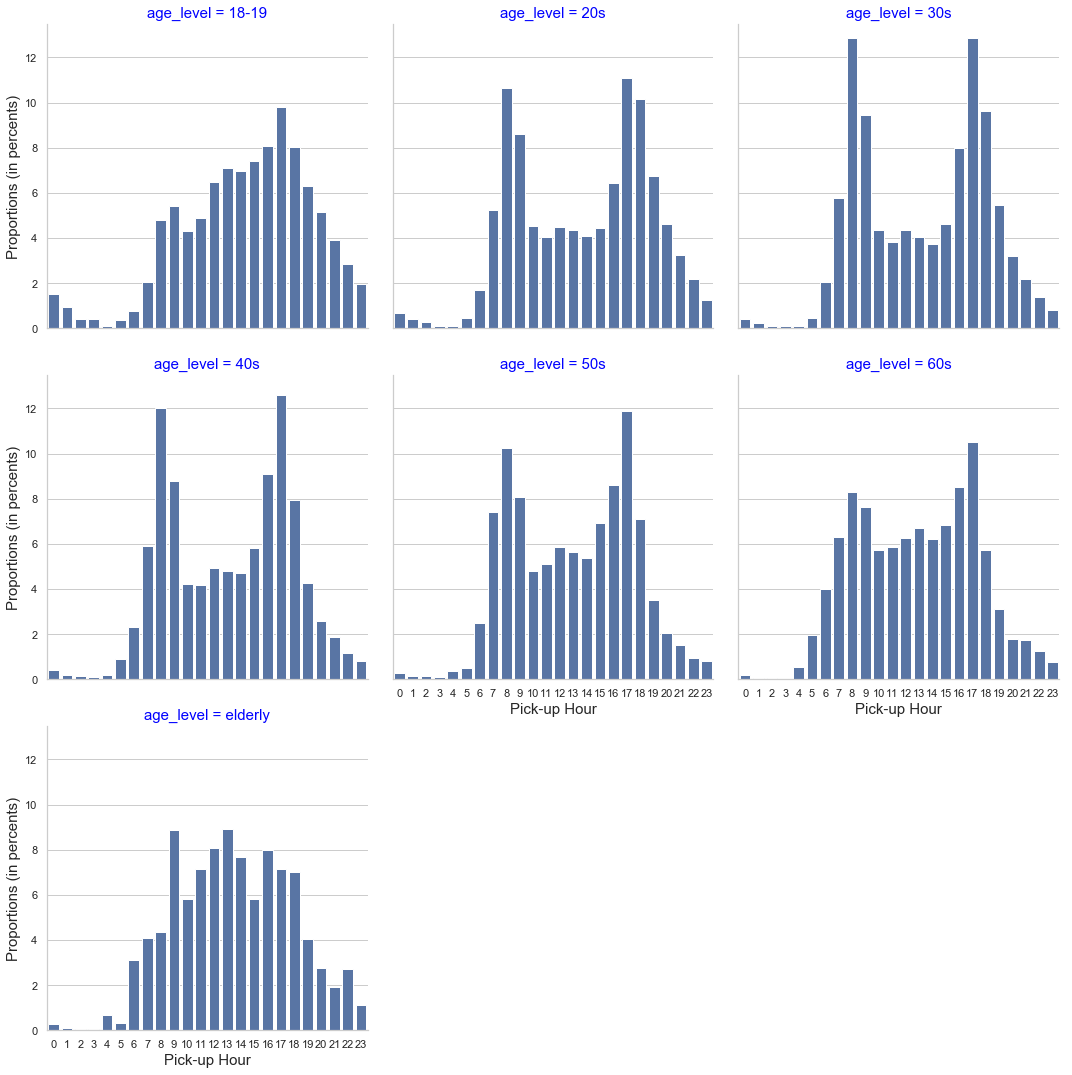

In [169]:
# Proportions of rentals, faceted by age_level, for each hour of the day.
age_props_byhour= (df_time.groupby(['age_level'])['hour_of_day']
                                      .value_counts(normalize=True)
                                      .rename('percentage')
                                      .mul(100)
                                      .reset_index())
print(age_props_byhour.head())
arr= sorted(age_props_byhour['hour_of_day'].unique()) # list and sort the hours of the day
g= sns.FacetGrid(data=age_props_byhour, col='age_level', height=5, col_wrap=3);
g= g.map(sns.barplot, 'hour_of_day', 'percentage', order= arr); # we specify the order on the x-axis
# to avoid a warning.
g.set_xlabels('Pick-up Hour', fontsize=15);
g.set_ylabels('Proportions (in percents)', fontsize=15);
g.set_titles(size=15, color='blue');

#### Interpretation:
We observe a similar shape of distribution than for the Frequency of rentals per hour of day, (see [Univariate Exploration](#hourofday)), for the age levels between 20s and 50s decades.
The youngest and oldest age Categories distributions look more unimodal with a peak around 5pm for 18 to 19 years old and +60 years old. The elderly category distribution seems bimodal with two peaks at 9am and 1pm.

[Back to Exploratory Data Analysis](#eda)

<a id='subscribertime'></a>
#### Plot the proportions of subscriber/customer by time units:

We will use clustered bar charts for the following plots.

  user_type  month  percentage
0  Customer      7   12.751923
1  Customer      6   11.832242
2  Customer      8   11.647812
3  Customer      9   11.544965
4  Customer     10   10.214394


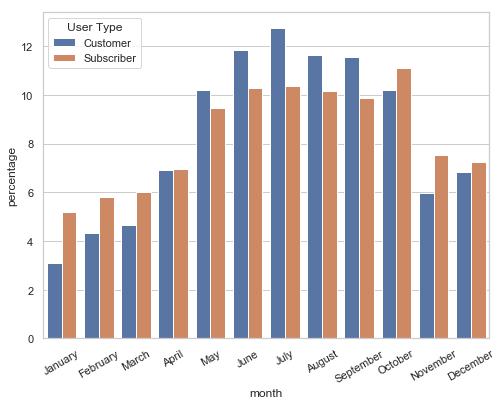

In [170]:
# get proportions of rentals per user type, for each month of the year
usertype_prop_bymonth= (df_time.groupby(['user_type'])['month']
                                      .value_counts(normalize= True)
                                      .rename('percentage')
                                      .mul(100)
                                      .reset_index())
print(usertype_prop_bymonth.head())

fig=plt.figure(figsize=[8,6]);
sns.barplot(data=usertype_prop_bymonth, x='month', y= 'percentage', hue='user_type');
locs, labs= plt.xticks();
plt.xticks(ticks=locs, labels=months, rotation=30);
plt.legend(title='User Type', loc='upper left');


#### Interpretation:
We observe the same tendency for each user-type than in the univariate distribution of the frequency of rentals per months of the year (see [Univariate Exploration](#month)): The biggest proportions of rentals in both groups are depicted beween May until October.<br>
Furthermore, we observe a bigger use of rentals, in proportion, from "Customer" users from May to September. "Subscriber" users make a bigger use of rentals in proportion from October until March.
During the month of April there is an equal proportion of rentals contracted by both groups.

#### Plot the Proportion of rentals per days of the week and hours of the day, by user type (Customer/Subscriber):


  user_type weekday_name  percentage
0  Customer     Saturday   17.480370
1  Customer       Friday   15.141611
2  Customer       Sunday   14.950258
3  Customer     Thursday   14.119578
4  Customer    Wednesday   13.324994


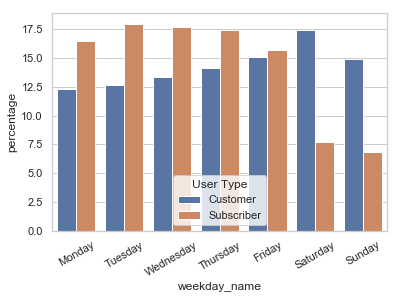

In [171]:
# get proportions of rentals per user type, for each day of the week
usertype_prop_weekday= (df_time.groupby(['user_type'])['weekday_name']
                                        .value_counts(normalize=True)
                                        .rename('percentage')
                                        .mul(100)
                                        .reset_index())
print(usertype_prop_weekday.head())
fig= plt.figure(figsize=[6,4]);
sns.barplot(data=usertype_prop_weekday, x='weekday_name', y='percentage', hue='user_type', \
            order=days)
locs,labs= plt.xticks()
plt.xticks(locs, labels=days, rotation=30);
plt.legend(loc='lower center', title='User Type')

#### Interpretation:
We observe that "Customer" users mostly use rentals, during the week-end and also much more than "Subscriber" users do, in proportion.
We observe the opposite tendency between monday and friday: "Subscriber" users, mostly use rentals during these days, and more than "Customer" users do. 

  user_type  hour_of_day  percentage
0  Customer           17   10.947173
1  Customer           18    9.185439
2  Customer           16    8.641047
3  Customer           15    7.420739
4  Customer           14    7.015783


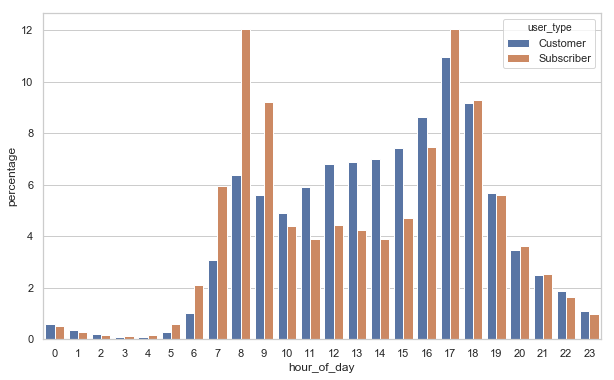

In [172]:
# get proportions of rentals per user type, for each hour of the day
plt.figure(figsize=[10,6])
usertype_prop_byhour = (df_time.groupby(['user_type'])['hour_of_day']
                                       .value_counts(normalize=True)
                                       .rename('percentage')
                                       .mul(100)
                                       .reset_index())
print(usertype_prop_byhour.head())

sns.barplot(data=usertype_prop_byhour, x='hour_of_day', y='percentage', hue='user_type');

#### Interpretation:
We clearly see a difference in the distributions of rentals per pick-up hour, for each user-type: The distribution for "Subscriber" users is similar to the univariate distribution of rentals per hour of pick-up (see [Univariate Exploration](#hourofday)). It looks bimodal with two big peaks around 8am and 5pm. "Customers", on the other hand, mostly pick-up rentals around 5pm and use more rentals in proportion, between 10am and 4pm, than "Subscribers".

### Conclusion on the Bivariate Exploration:

[To Answer following questions:
(1)"Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?"
(2) "Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?"]

Here are the most interesting insights we could gain, looking at factors influencing both the duration of the trips and the frequencies of rentals by pick-up time:
- The "Duration" variable shows some Correlation with each of the users' characteristics we have been looking at (Gender, Age, User-Type, Bike-Share-Program):<br>
    - The User-Type seems to influence the duration in the strongest way: 'Customers' tend to use rentals for a significant longer time than Subscribers.<br>
    - Looking at the differences between gender groups, it seems that male users pick-up rentals for slightly shorter trips.<br>
    - Users in their 20's, 50's and 60's, tend to pick-up rentals for a slightly longer time than users of other age categories.<br><br>
- The "Pick-up Time" variables are influenced by users' characteristics in the following way:<br>
    - There are less men, in proportion, using rentals during summer, from June to September and also during the week-end, than the 2 other groups<br>
    - Looking at the differences across age categories, we found out following tendencies:
        1. The older the users, the more rentals are used, in proportion, from January until May<br>
        2. During the month of june the use of rentals across all age categories is uniform, in proportion<br>
        3. The younger the users, the more rentals are used, from July until October<br>
        4. The youngest and oldest users, pick-up more rentals in proportion, during the week-end than users of other age categories.
    - Looking at the User-Type variable, we notice following tendencies:
        1. There are more Customers using rentals, in proportion, from May to September<br>
        2. There are more Subscribers using rentals, from October until March<br>
        3. There is the same proportion of both user-types during April.<br>
        4. Customers use more rentals during the week-end than during the working days, as opposed to Subscribers<br>
        5. Customers use more rentals during the week-end, in proportion, than Subscribers<br>
        6. Customers use more rentals, between 10am and 4pm, in proportion, than Subscribers<br><br>
- The "Duration" vary with the "Pick-up Time" in the following way:
    - Duration Trips tend to be slightly longer during the months from June until October
    - During the week, from Monday until Thursday the duration of the trips tend to be minimum in average. It increases, slightly on Fridays and is maximum during the week-end
    - During the day, the duration time is maximum in average at 8am and between 11am and 6pm.

[Back to Bivariate Exploration](#bivariate)

[Back to Exploratory Data Analysis](#eda)

[Back to Top](#top)

<a id='multivariate'></a>
## Multivariate Exploration
- [median duration as outcome variable](#firstperspective)
- [frequencies as outcome variable](#secondperspective)

<a id='firstperspective'></a>
### Exploring the influence of the user type combined with other variables  on the duration time:
We found out, through our bivariate exploration, that the user type had a strong correlation with the duration variable. The users of type "Customer" have a higher median trip duration than the "Subscribers"(14 minutes vs. 8 minutes). We will now, further investigate this correlation, through the filter of other features like the pick-up time variables and the gender characteristic:

- [median duration vs. User-type and pick-up time units(3 variables)](#3var)
- [median duration vs. User-type and gender and time units(4 variables)](#4var)

<a id='3var'></a>
#### Plot the median duration by user-type and pick-up time units (using clustered barcharts):

In [173]:
# plot the Duration by User-type and days of the week
df_3vars= df_time.groupby(['weekday_name', 'user_type'])['duration_min'].median().reset_index()
df_3vars.head()

,weekday_name,user_type,duration_min
0,Friday,Customer,13.0
1,Friday,Subscriber,8.0
2,Monday,Customer,13.0
3,Monday,Subscriber,8.0
4,Saturday,Customer,18.0


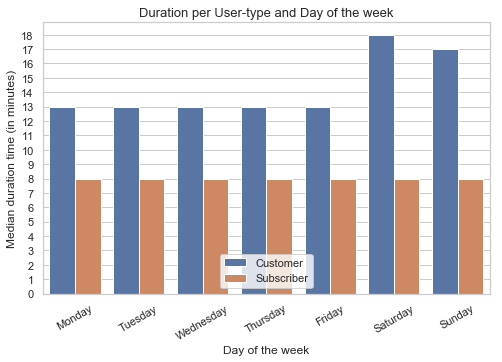

In [174]:
plt.figure(figsize=[8,5]);
sns.barplot(data=df_3vars, x= 'weekday_name', order= days, y= 'duration_min', hue= 'user_type')
plt.legend(loc='lower center');
plt.yticks(np.arange(0, 19), np.arange(0, 19));
plt.xticks(np.arange(0,7), days, rotation=30);
plt.title('Duration per User-type and Day of the week', fontsize=13);
plt.xlabel('Day of the week');
plt.ylabel('Median duration time (in minutes)');

In [175]:
# plot the median duration by user-type and hour of day
df_3vars2= df_time.groupby(['hour_of_day', 'user_type'])['duration_min'].median().reset_index()
df_3vars2.head()

,hour_of_day,user_type,duration_min
0,0,Customer,11.0
1,0,Subscriber,7.0
2,1,Customer,12.5
3,1,Subscriber,7.0
4,2,Customer,13.0


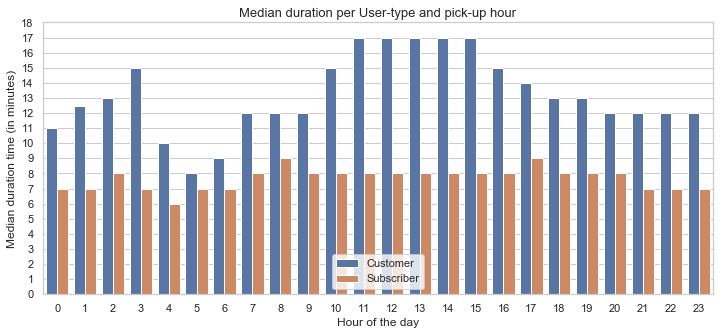

In [176]:
plt.figure(figsize=[12,5]);
sns.barplot(data=df_3vars2, x= 'hour_of_day', y= 'duration_min', hue= 'user_type')
plt.legend(loc='lower center');
plt.yticks(np.arange(0, 19), np.arange(0, 19));
plt.title('Median duration per User-type and pick-up hour', fontsize=13);
plt.xlabel('Hour of the day');
plt.ylabel('Median duration time (in minutes)');

In [177]:
# plot the median duration by user-type and month
df_durationbymonth= df_time.groupby(['month', 'user_type'])['duration_min'].median().reset_index()
df_durationbymonth.head()

,month,user_type,duration_min
0,1,Customer,14.0
1,1,Subscriber,8.0
2,2,Customer,15.0
3,2,Subscriber,8.0
4,3,Customer,15.0


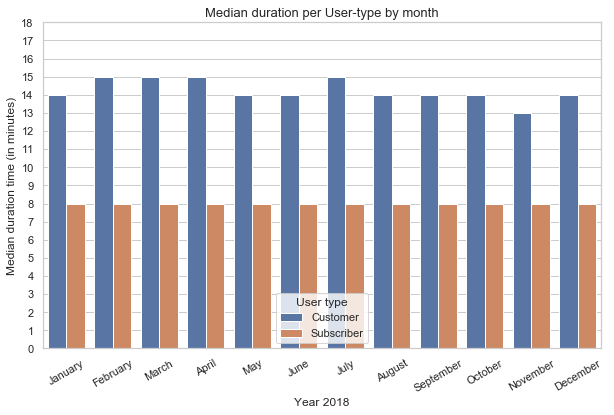

In [178]:
plt.figure(figsize=[10,6]);
sns.barplot(data=df_durationbymonth, x='month', y='duration_min', hue='user_type');
plt.legend(loc='lower center', title='User type');
plt.yticks(np.arange(0, 19), np.arange(0, 19));
locs, labs= plt.xticks();
plt.xticks(locs, months, rotation=30);
plt.title('Median duration per User-type by month', fontsize=13);
plt.xlabel('Year 2018');
plt.ylabel('Median duration time (in minutes)');

#### Conclusion on plotting the median duration by pick-up time units and user-type:

The variation of the median duration of rentals by Pick-Up time and User-Type, looks very contrasted:<br>The median duration for the "Subscriber" users, remains either constant by month of the year and for each day of the week (8 minutes) or shows few variation by pick-up hour, during the day (6 to 9 minutes).<br>Variations of the median duration within the "Customers" group have a bigger amplitude (8 to 17 minutes during one day) and we observe the longest trip durations:
- during the week-end (about 18 minutes) as opposed to working days (13 minutes)
- from 11am to 3pm during the day (17 minutes)
- during the months of February, March, April and July (15 minutes)<br>
The biggest variation of the trips' duration observed, for the "Customers", occurs in the measurement by days of the week and hour of the day. The duration time shows few fluctuation, when looking at the median variation by month (between 13 and 15 minutes).

[Back to Multivariate Exploration](#multivariate)

We will now dig a bit deeper by adding the "gender" variable, to see how, or if, this perspective change our previous findings.

<a id='4var'></a>
#### Plot the Duration per User-type and Pick-up time units faceted by Gender:

In [179]:
# extract the variables to plot the duration by user-type and day of the week, faceted by gender:
df_4vars= df_time.groupby(['weekday_name', 'user_type', 'gender'])['duration_min'].median()\
                        .reset_index()
df_4vars.head()

,weekday_name,user_type,gender,duration_min
0,Friday,Customer,Female,15.0
1,Friday,Customer,Male,13.0
2,Friday,Customer,Other,12.0
3,Friday,Subscriber,Female,9.0
4,Friday,Subscriber,Male,8.0


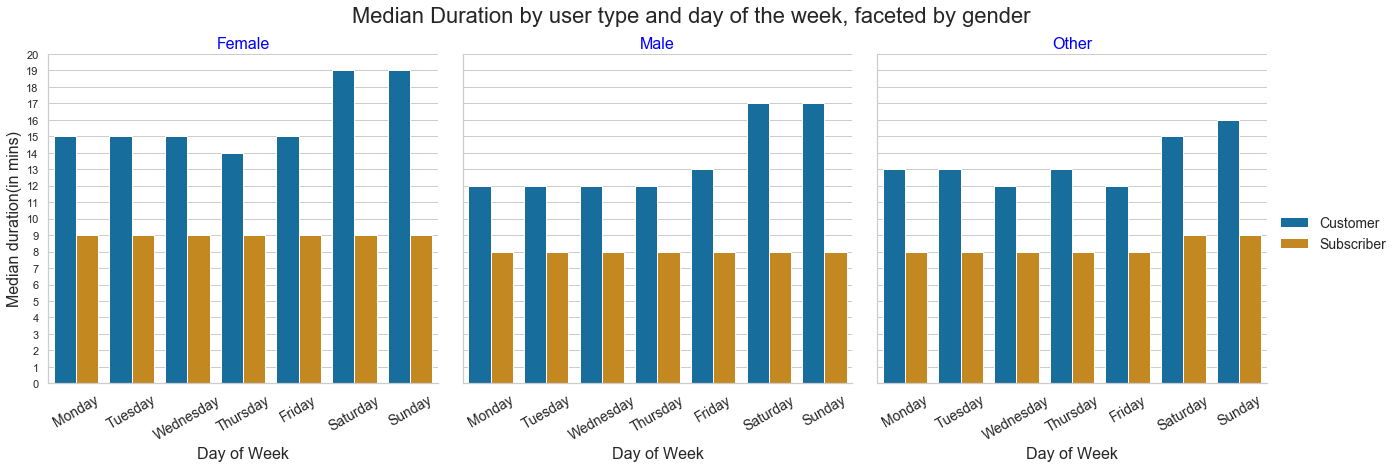

In [180]:
# plot with a FacetGrid Object:
g= sns.FacetGrid(data= df_4vars, col='gender', height=6, col_wrap=3);
g= g.map(sns.barplot, 'weekday_name', 'duration_min', 'user_type', order=days, hue_order=\
        ['Customer', 'Subscriber'], palette= sns.color_palette('colorblind'));
g.add_legend(fontsize=14);
g.set(yticks=np.arange(0, 21));
g.set_titles('{col_name}', color='blue', size=16);
g.set_xlabels('Day of Week', fontdict={'fontsize': 16});
g.set_ylabels('Median duration(in mins)', fontdict={'fontsize': 16});
[plt.setp(ax.get_xticklabels(), rotation=30, fontsize= 14) for ax in g.axes.flat];
#add a title
plt.subplots_adjust(top=0.87);
g.fig.suptitle('Median Duration by user type and day of the week, faceted by gender', \
              fontsize=22); 

In [181]:
# extract variables to plot the duration by user-type and hour of the day, faceted by gender:
df_4vars2= df_time.groupby(['hour_of_day', 'user_type', 'gender'])['duration_min'].median()\
                        .reset_index()
df_4vars2.head()

,hour_of_day,user_type,gender,duration_min
0,0,Customer,Female,11.0
1,0,Customer,Male,11.0
2,0,Customer,Other,18.0
3,0,Subscriber,Female,8.0
4,0,Subscriber,Male,7.0


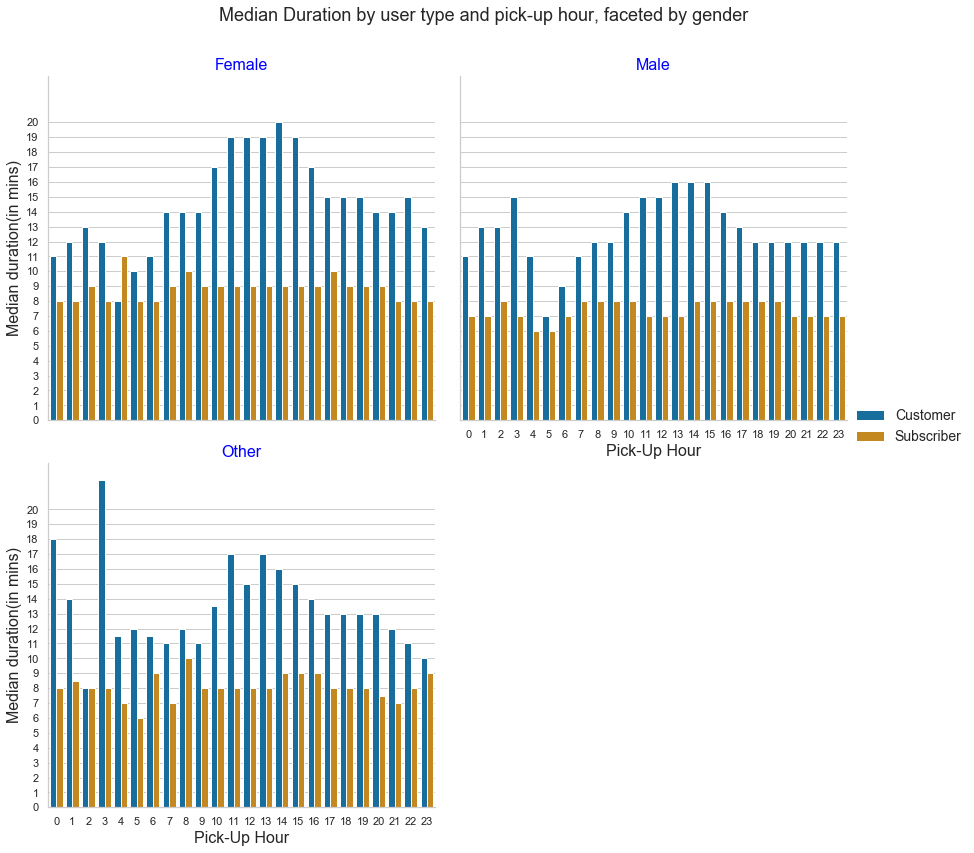

In [183]:
# plot with a FacetGrid Object:
g= sns.FacetGrid(data= df_4vars2, col='gender', height=6, col_wrap=2);
g= g.map(sns.barplot, 'hour_of_day', 'duration_min', 'user_type',order=np.arange(0, 24),\
         hue_order= ['Customer', 'Subscriber'], palette= sns.color_palette('colorblind'));
g.add_legend(fontsize=14);
g.set(yticks=np.arange(0, 21));
g.set_titles('{col_name}', color='blue', size=16);
g.set_xlabels('Pick-Up Hour', fontdict={'fontsize': 16});
g.set_ylabels('Median duration(in mins)', fontdict={'fontsize': 16});
#add a title
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Median Duration by user type and pick-up hour, faceted by gender', \
              fontsize=18); 

In [185]:
# extract variables to plot the duration by user-type and month, faceted by gender:
df_4vars3= df_time.groupby(['month_name', 'user_type', 'gender'])['duration_min'].median()\
                        .reset_index()
df_4vars3.head()

,month_name,user_type,gender,duration_min
0,April,Customer,Female,17.0
1,April,Customer,Male,14.0
2,April,Customer,Other,15.0
3,April,Subscriber,Female,9.0
4,April,Subscriber,Male,8.0


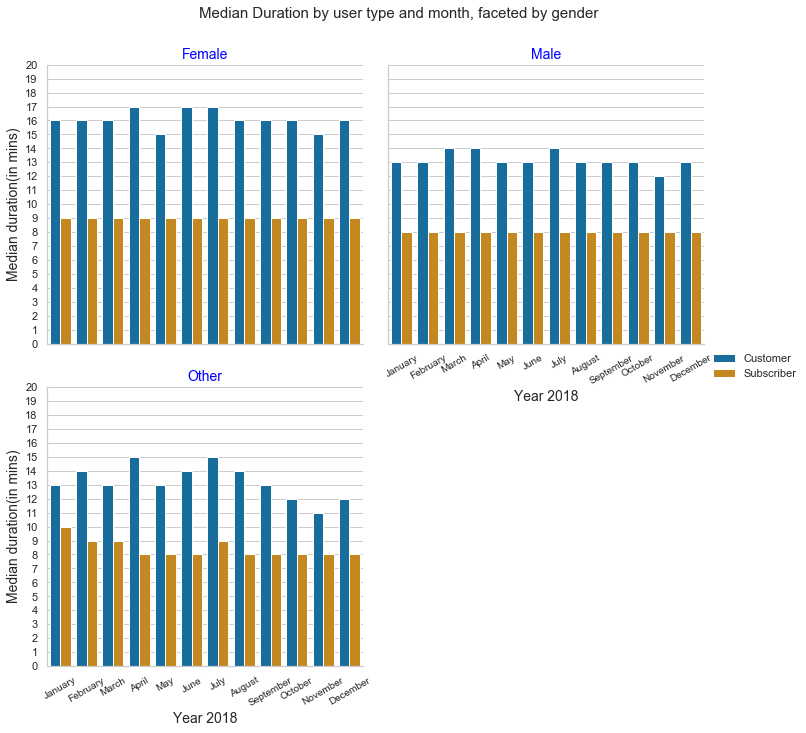

In [186]:
# plot with a FacetGrid Object:
g= sns.FacetGrid(data= df_4vars3, col='gender', height=5, col_wrap=2);
g= g.map(sns.barplot, 'month_name', 'duration_min', 'user_type',order=months,\
         hue_order= ['Customer', 'Subscriber'], palette= sns.color_palette('colorblind'));
g.add_legend(fontsize=11);
g.set(yticks=np.arange(0, 21));
g.set_titles('{col_name}', color='blue', size=14);
g.set_xlabels('Year 2018', fontdict={'fontsize': 14});
g.set_ylabels('Median duration(in mins)', fontdict={'fontsize': 14});
g.set_xticklabels(fontsize=10, rotation=30);
# rotate the xtixks labels:
#[plt.setp(ax.get_xticklabels(), rotation=30, fontsize= 11) for ax in g.axes.flat];
#add a title
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Median Duration by user type and month, faceted by gender', \
              fontsize=15); 

#### Observation on the Facets by gender:


We observed back to the [Bivariate Exploration](#durationgender) that "gender" has an effect on the median duration: the values decrease along the category levels, in the following order: ['Female', 'Other', 'Male'] (10mins, 9mins and 8 mins respectively).<br>We also observed that the variations of the median duration, along the different measures of time, were more important for the users of type "Customer" than for the "Subscriber"(s), for whom the duration remains either constant or of low variation. Faceting these graphs with the gender variable, even adds to this constrastful Tendency: 
- for users of the "Subscriber" category, the median duration shows very low variation across the gender levels, for every time variables we are looking at (day of week, pick-up hour, months of the year).
- for users of the "Customer" category, the variation of the median duration along the different "time-perpectives" is even emphasized by the gender category in the following decreasing order: ['Female', 'Other', 'Male'].

[Back to Multivariate Exploration](#multivariate)

<a id='secondperspective'></a>
### Exploring the proportions of rentals by user-type, pick-up time and other variables: 

We will eventually investigate the relative frequency of rentals by user type and pick-up time units, through the filter of the 'gender' characteristic:

- [frequency of rentals per user-type and pick-up time faceted by gender](#usertimegender)

<a id='usertimegender'></a>
#### Plot the proportions of rentals by user_type and gender, by pick-up time units:
- [by day of the week](#multipropgenderweek)
- [by hour of the day](#multipropgenderhour)
- [by month of the year](#multipropgendermonth)

<a id='multipropgenderweek'></a>
Proportions by day of the week:

In [187]:
# proportions of user_types of each gender by day of the week:
props_users_gender_byday = (df_time.groupby(['user_type', 'gender'])['weekday_name']
                                    .value_counts(normalize=True)
                                    .mul(100)
                                    .rename('percentage')
                                    .reset_index())
props_users_gender_byday.head()
                           

,user_type,gender,weekday_name,percentage
0,Customer,Female,Saturday,19.609037
1,Customer,Female,Sunday,16.612800
2,Customer,Female,Friday,14.022515
3,Customer,Female,Thursday,13.304292
4,Customer,Female,Wednesday,12.347183


In [188]:
# verify that the percentages of all days add up to 100%, for each group:
props_users_gender_byday.groupby(['user_type', 'gender'])['percentage'].sum()

user_type   gender
Customer    Female    100.0
            Male      100.0
            Other     100.0
Subscriber  Female    100.0
            Male      100.0
            Other     100.0
Name: percentage, dtype: float64

We will plot a heatmap for the proportions of user type by days of the week, for each gender.<br> We will use seaborn's "heatmap" function, and need 3 matrices with the two categorical variables 'weekday_name' and 'user_type', for each level of the 'gender' variable.

In [189]:
# get the subset for the 'Female' gender value and organize data in a matrix
df_female_subset= props_users_gender_byday.loc[props_users_gender_byday['gender'] == 'Female']
prop_user_by_day_female= df_female_subset.pivot(index='weekday_name', columns='user_type', \
                                                values='percentage')
prop_user_by_day_female

user_type,Customer,Subscriber
weekday_name,,
Friday,14.022515,15.345247
Monday,12.336253,16.554215
Saturday,19.609037,7.910324
Sunday,16.612800,6.904679
Thursday,13.304292,17.391048
Tuesday,11.767920,18.207817
Wednesday,12.347183,17.686669


In [190]:
# sort index in the order of the week:
prop_user_by_day_female= prop_user_by_day_female.reindex(days)
prop_user_by_day_female

user_type,Customer,Subscriber
weekday_name,,
Monday,12.336253,16.554215
Tuesday,11.767920,18.207817
Wednesday,12.347183,17.686669
Thursday,13.304292,17.391048
Friday,14.022515,15.345247
Saturday,19.609037,7.910324
Sunday,16.612800,6.904679


In [191]:
# get the subset for the 'Other' gender value and organize data in a matrix
df_other_subset= props_users_gender_byday.loc[props_users_gender_byday['gender'] == 'Other']
prop_user_by_day_other= df_other_subset.pivot(index='weekday_name', columns='user_type', \
                                                values='percentage')
prop_user_by_day_other= prop_user_by_day_other.reindex(days)
prop_user_by_day_other

user_type,Customer,Subscriber
weekday_name,,
Monday,12.270838,15.550239
Tuesday,12.979712,16.776860
Wednesday,13.517477,17.890387
Thursday,15.228550,16.759461
Friday,14.959668,15.545890
Saturday,17.184063,9.225750
Sunday,13.859692,8.251414


In [192]:
# get the subset for the 'Male' gender value and organize data in a matrix
df_male_subset= props_users_gender_byday.loc[props_users_gender_byday['gender'] == 'Male']
prop_user_by_day_male= df_male_subset.pivot(index='weekday_name', columns='user_type', \
                                                values='percentage')
prop_user_by_day_male= prop_user_by_day_male.reindex(days)
prop_user_by_day_male

user_type,Customer,Subscriber
weekday_name,,
Monday,12.360372,16.463731
Tuesday,13.034465,17.966271
Wednesday,13.786109,17.761588
Thursday,14.475117,17.508984
Friday,15.681625,15.851935
Saturday,16.472790,7.662531
Sunday,14.189522,6.784959


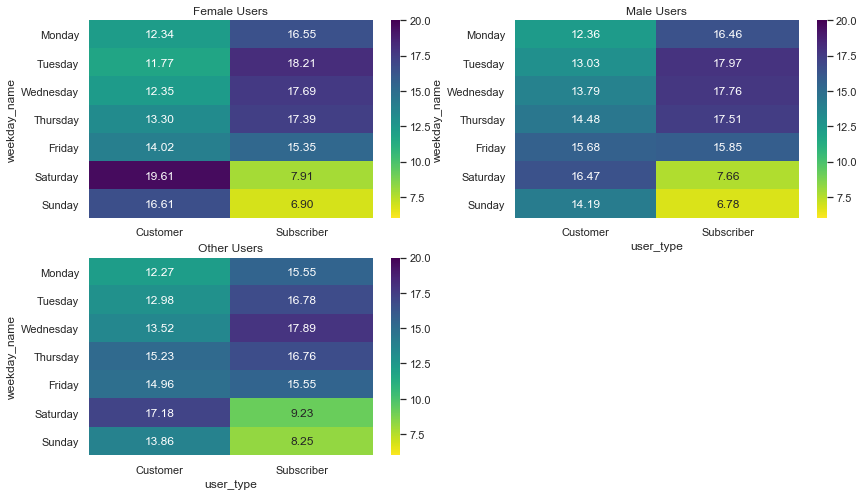

In [193]:
fig= plt.figure(figsize=[14, 8]);
#set the same boundaries to the 3 colormaps to compare the subplots
vmin_all= 6 
vmax_all= 20
plt.subplot(221);
sns.heatmap(prop_user_by_day_female, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all)
plt.xlabel("")
plt.title("Female Users");

plt.subplot(222);
sns.heatmap(prop_user_by_day_male, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all)
plt.title("Male Users");

plt.subplot(223);
sns.heatmap(prop_user_by_day_other, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all)
plt.title("Other Users");

#### Interpretation:
We clearly observe for each level of the gender category, the same polarity of use we saw before, between the two groups of users: "Customers" use a much higher proportion of rentals during the week-end as opposed to "Subscribers".<br> During the working days, we observe the opposite, with less contrast though: "Subscribers" use a a bigger proportion of rentals than "Customers" do.<br>
This contrast in proportions of use, is emphasized in the group of "Female" Users, whereas the two other groups show less variations in proportions.

[Back to Multivariate Exploration](#multivariate)

<a id='multipropgenderhour'></a>
Proportion by hour of the day:

In [194]:
# proportions of user_types of each gender by hour of the day:
props_users_gender_byhour = (df_time.groupby(['user_type', 'gender'])['hour_of_day']
                                    .value_counts(normalize=True)
                                    .mul(100)
                                    .rename('percentage')
                                    .reset_index())
#verify the percentages add to 100% for each group:
print(props_users_gender_byhour.groupby(['user_type', 'gender'])['percentage'].sum())

props_users_gender_byhour.head()


user_type   gender
Customer    Female    100.0
            Male      100.0
            Other     100.0
Subscriber  Female    100.0
            Male      100.0
            Other     100.0
Name: percentage, dtype: float64


,user_type,gender,hour_of_day,percentage
0,Customer,Female,17,10.578169
1,Customer,Female,16,8.940309
2,Customer,Female,18,8.724843
3,Customer,Female,15,7.773978
4,Customer,Female,13,7.391447


Generate 3 matrices with the two categorical variables 'user_type' and 'hour_of_day', for each level of the 'gender' variable.

In [195]:
# get the subset for the 'Female' gender value and organize data in a matrix

df_female= props_users_gender_byhour.loc[props_users_gender_byhour['gender'] == 'Female']
prop_user_by_hour_female= df_female.pivot(index='user_type', columns='hour_of_day', \
                                                values='percentage')
# get min and max values for setting colormap boundaries later
print(prop_user_by_hour_female.min(axis=1).min(), prop_user_by_hour_female.max(axis=1).max())
prop_user_by_hour_female.head()

0.034349774384436434 13.947136092458331


hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
user_type,,,,,,,,,,,,,,,,,,,,,
Customer,0.434056,0.196731,0.103049,0.034350,0.064015,0.168626,0.733836,3.093041,6.773151,5.591206,...,7.360220,7.773978,8.940309,10.578169,8.724843,5.250831,3.197652,2.185895,1.598826,0.875919
Subscriber,0.304181,0.137510,0.071163,0.038792,0.045213,0.474063,1.971695,7.069745,13.947136,9.138019,...,3.825678,4.472297,7.753016,12.172075,9.429894,5.437813,3.237914,2.144252,1.195324,0.631371


In [196]:
# get the subset for the 'Male' gender value and organize data in a matrix

df_male= props_users_gender_byhour.loc[props_users_gender_byhour['gender'] == 'Male']
prop_user_by_hour_male= df_male.pivot(index='user_type', columns='hour_of_day', \
                                                values='percentage')
print(prop_user_by_hour_male.min(axis=1).min(), prop_user_by_hour_male.max(axis=1).min())
prop_user_by_hour_male.head()

0.0902271337598616 11.144169537530013


hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
user_type,,,,,,,,,,,,,,,,,,,,,
Customer,0.687516,0.410123,0.275155,0.102158,0.090227,0.356434,1.144617,3.065486,6.198828,5.614216,...,6.871430,7.254709,8.514160,11.14417,9.39257,5.811821,3.580004,2.661328,1.973812,1.200543
Subscriber,0.602091,0.352606,0.220021,0.138477,0.184752,0.618902,2.185655,5.632771,11.516241,9.256234,...,3.918356,4.755806,7.399961,12.07613,9.26334,5.636498,3.711333,2.650915,1.769963,1.089968


In [197]:
# get the subset for the 'Other' gender value and organize data in a matrix

df_other= props_users_gender_byhour.loc[props_users_gender_byhour['gender'] == 'Other']
prop_user_by_hour_other= df_other.pivot(index='user_type', columns='hour_of_day', \
                                                values='percentage')
print(prop_user_by_hour_other.min(axis=1).min(), prop_user_by_hour_other.max(axis=1).min())
prop_user_by_hour_other.head()

0.034797738147020446 9.865158764680295


hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
user_type,,,,,,,,,,,,,,,,,,,,,
Customer,0.513322,0.439990,0.415546,0.122220,0.244439,0.586654,0.586654,3.00660,5.915424,5.744317,...,6.355414,7.333170,8.115375,10.266439,9.606453,7.382058,3.984356,2.591054,2.151063,1.271083
Subscriber,0.539365,0.200087,0.160940,0.034798,0.126142,0.217486,1.474554,4.92388,7.907786,9.612875,...,5.237060,5.793823,7.285776,9.865159,8.821227,5.724228,4.358417,2.827316,2.127012,1.357112


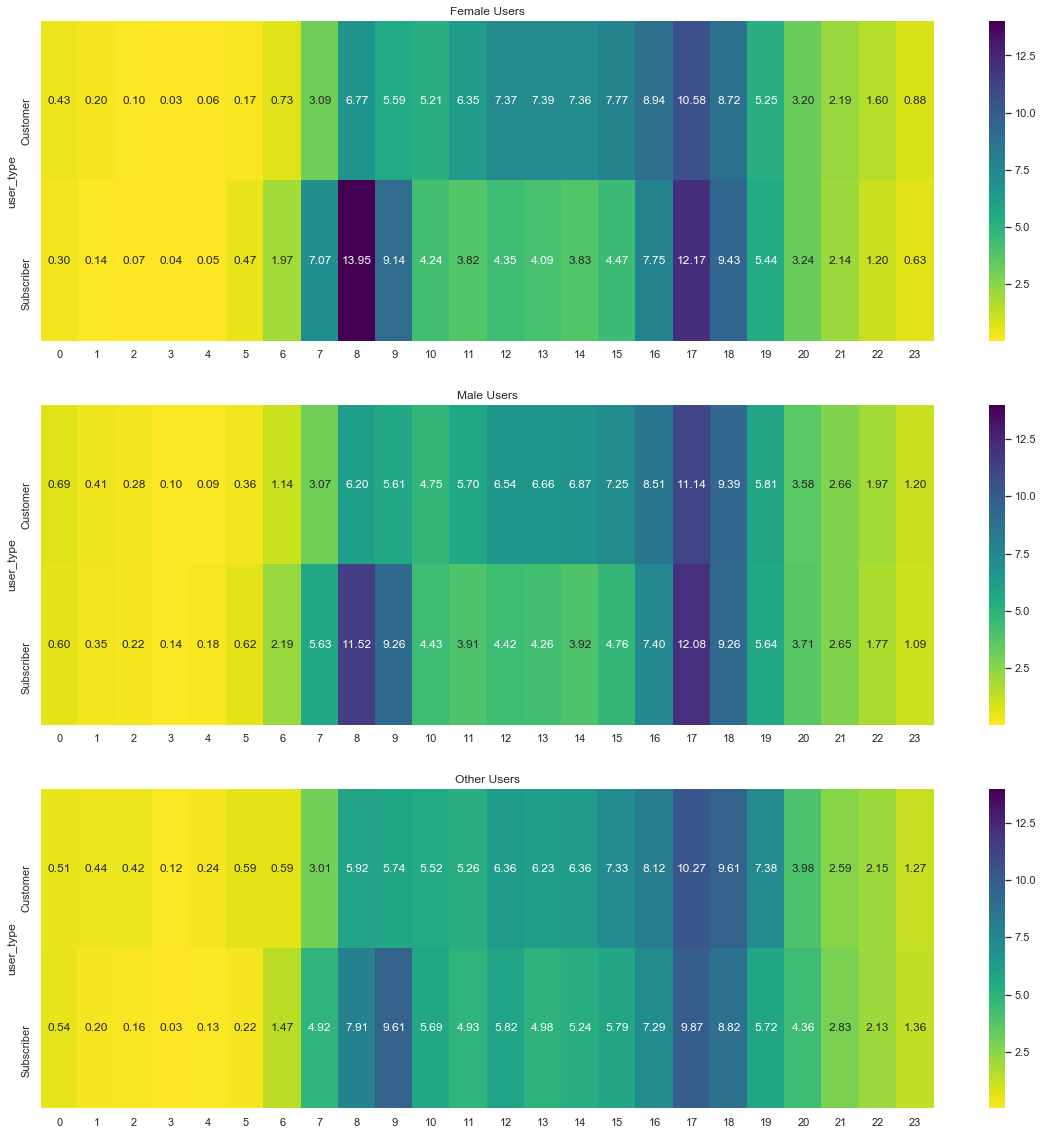

In [198]:
# plot the heatmaps within subplots:
fig= plt.figure(figsize=[20,20]);
#set the same boundaries to the 3 colormaps to compare the subplots
vmin_all= 0.03
vmax_all= 14
plt.subplot(311);
sns.heatmap(prop_user_by_hour_female, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all)
plt.xlabel("")
plt.title("Female Users");

plt.subplot(312);
sns.heatmap(prop_user_by_hour_male, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all)
plt.xlabel("")
plt.title("Male Users");

plt.subplot(313);
sns.heatmap(prop_user_by_hour_other, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all)
plt.xlabel("")
plt.title("Other Users");

#### Interpretation:
We observe the same tendency within a day, for each level of the gender category, than before, within the two groups of users: "Subscribers" mostly use rentals at 8am and 5pm
whereas "Customers" mostly use rentals at 5pm and more than "Subscribers", in proportion, between 11am and 3pm.<br> The "Female" group shows the highest contrast in these proportions for the two user types.

[Back to Multivariate](#multivariate)

<a id='multipropgendermonth'></a>
Proportion by month of the year:

In [199]:
# proportions of user_types of each gender by month of the year:
props_users_gender_bymonth = (df_time.groupby(['user_type', 'gender'])['month_name']
                                    .value_counts(normalize=True)
                                    .mul(100)
                                    .rename('percentage')
                                    .reset_index())
props_users_gender_bymonth.head()


,user_type,gender,month_name,percentage
0,Customer,Female,July,12.709417
1,Customer,Female,August,11.371337
2,Customer,Female,June,11.340110
3,Customer,Female,September,11.140256
4,Customer,Female,May,10.192515


In [200]:
# get the subset for the 'Female' gender value and organize data in a matrix
df_female_group= props_users_gender_bymonth.loc[props_users_gender_bymonth['gender'] == 'Female']
prop_user_by_month_female= df_female_group.pivot(index='user_type', columns='month_name', \
                                                values='percentage')
print(prop_user_by_month_female.min(axis=1).min(), prop_user_by_month_female.max(axis=1).max());
prop_user_by_month_female= prop_user_by_month_female.reindex(months, axis=1)# reorder columns in the year's months order
prop_user_by_month_female.head()

3.5973581900791607 12.70941652224148


month_name,January,February,March,April,May,June,July,August,September,October,November,December
user_type,,,,,,,,,,,,
Customer,3.597358,5.305479,5.886302,7.235312,10.192515,11.340110,12.709417,11.371337,11.140256,9.550799,5.549050,6.122067
Subscriber,4.803767,5.563819,5.821986,6.905482,9.482865,10.565826,10.710559,10.688889,10.159448,11.232510,7.241499,6.823350


In [201]:
# get the subset for the 'Male' gender value and organize data in a matrix
df_male_group= props_users_gender_bymonth.loc[props_users_gender_bymonth['gender'] == 'Male']
prop_user_by_month_male= df_male_group.pivot(index='user_type', columns='month_name', \
                                                values='percentage')
print(prop_user_by_month_male.min(axis=1).min(), prop_user_by_month_male.max(axis=1).max());
prop_user_by_month_male= prop_user_by_month_male.reindex(months, axis=1)# reorder columns in the year's months order
prop_user_by_month_male.head()

2.872354704487495 12.759309799710678


month_name,January,February,March,April,May,June,July,August,September,October,November,December
user_type,,,,,,,,,,,,
Customer,2.872355,3.837263,4.005041,6.763307,10.181498,12.062846,12.759310,11.795893,11.80335,10.542407,6.185406,7.191326
Subscriber,5.342905,5.885896,6.059989,6.976297,9.456758,10.162317,10.260065,9.986750,9.78614,11.056960,7.640087,7.385836


In [202]:
# get the subset for the 'Other' gender value and organize data in a matrix
df_other_group= props_users_gender_bymonth.loc[props_users_gender_bymonth['gender'] == 'Other']
prop_user_by_month_other= df_other_group.pivot(index='user_type', columns='month_name', \
                                                values='percentage')
print(prop_user_by_month_other.min(axis=1).min(), prop_user_by_month_other.max(axis=1).max());
prop_user_by_month_other= prop_user_by_month_other.reindex(months, axis=1)# reorder columns in the year's months order
prop_user_by_month_other.head()


3.153263260816426 13.175262771938401


month_name,January,February,March,April,May,June,July,August,September,October,November,December
user_type,,,,,,,,,,,,
Customer,3.153263,5.328770,6.135419,7.162063,10.095331,11.977512,13.175263,11.121975,9.410902,9.850892,5.499878,7.088731
Subscriber,4.636799,4.980426,5.489343,6.424532,9.595476,11.609395,11.174424,10.835146,8.912571,11.157025,7.525011,7.659852


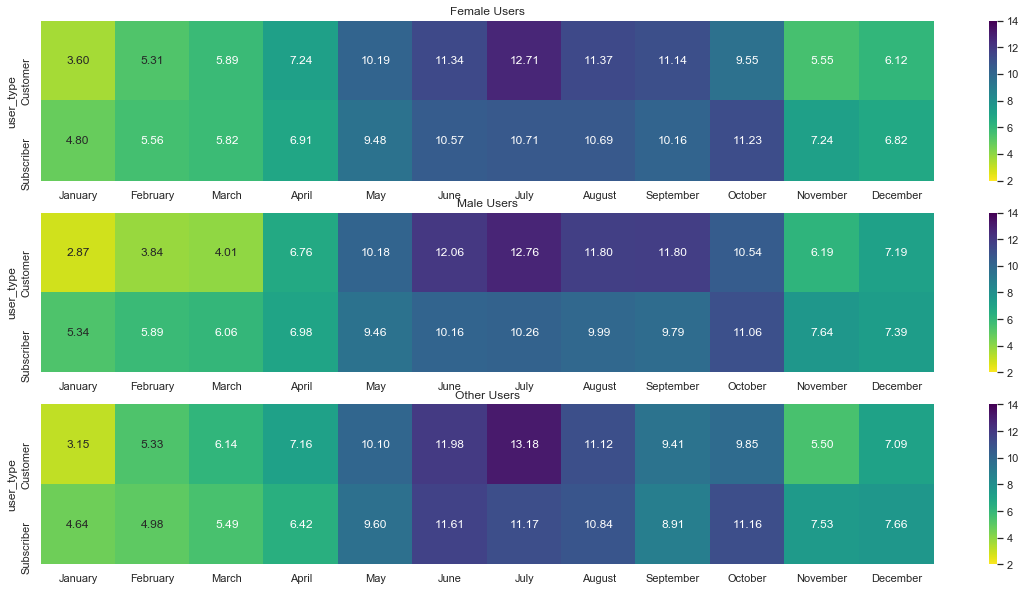

In [203]:
# plot the heatmaps within subplots:
fig= plt.figure(figsize=[20,10]);
#set the same boundaries to the 3 colormaps to compare the subplots
vmin_all= 2
vmax_all= 14
plt.subplot(311);
sns.heatmap(prop_user_by_month_female, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all)
plt.xlabel("")
plt.title("Female Users");

plt.subplot(312);
sns.heatmap(prop_user_by_month_male, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all)
plt.xlabel("")
plt.title("Male Users");

plt.subplot(313);
sns.heatmap(prop_user_by_month_other, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all)
plt.xlabel("")
plt.title("Other Users");

#### Interpretation of the plot:
We observe the same differences in the proportions of rentals for each level of the gender category, than before, between the two user types: "Customers" use more rentals, in proportion, than "Subscribers" do, from May until September and less, during the rest of the year. The proportions are quite equally distributed across all three levels of gender. 

#### Interpretation of the proportions of rentals by genre and user type for different pick-up time perspectives:
We could observe that 'gender' did not reveal any strong Correlation to the other variables. We could still notice a slight increase of the Contrast, between the two user-types, in the "Female" group, while looking at proportions of rentals per week and per hour.

### Conclusion of the Multivariate Exploration:

[Answering Questions like: "Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?" or Were there any interesting or surprising interactions between features?]

- We found out that the user-type variable, which we knew had an influence on both "duration" and "pick-up time" variables, is a feature that actually not only explains, more precisely, how the proportions of rentals vary by times of pick-up, as we saw before, but also, how the median duration vary through times of pick-up:<br>Trips duration do not vary much by time of pick-up for the "Subscribers" group.<br>There is a bigger variation of "duration" within the "Customer" group of users. These tend to rent bikes for a much longer time on the week-end, about 18 minutes, versus 13 minutes during working days and daily, between 11am and 3pm, 17 minutes versus around 12 minutes, otherwise.<br> 
The biggest variation of the trips' duration observed, for the "Customers", occurs in the measurement by days of the week and hour of the day. The duration time shows less fluctuation, when looking at the median variation by month (between 13 and 15 minutes).
- We observed that 'gender' emphasized the effect of the user-type variable on the "duration" and "pick-up" time variables. Both the "duration" by "pick-up" times and the proportions of rentals by time show a tendency of bigger contrast in the values within the group of "Customer" users, for the "Female" group.

<a id='conclusion'></a>
# Conclusion
If there is one major insight that emerged from the different levels of Exploratory Analysis that we conducted, it is that the user-type best illustrates the ways that bikes rentals are used:
- Day-to-day and professional commuting purposes represent the main reasons users chose the service for, all year long and for a quite constant period of time in average (median duration).
- Recreational or touristic transportation purpose, if less often in comparison, represents a significant alternative way of using the rentals, all year long and for longer periods of time in average. <br><br><br>

Note:<br>
<i> As a preparation for the explanatory Project we export the cleaned dataframe subset we used in our Analysis (df_time)</i>

In [204]:
# Export the dataframe 'df_time' to a csv file, so we can use it in an explanatory Analysis:
exportfilename='datasetcleaned.csv'
df_time.to_csv(os.path.join(datafolder,exportfilename), index=False)

[Back to Multivariate](#multivariate)

[Back to Exploratory Analysis](#eda)

[Back to Top](#top)